Umang Majumder, Mehul Darak, Soumyadeep Sarma
PRNN 2024 A2


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from libsvm.svmutil import *
import pandas as pd
import math
from cvxopt import matrix,solvers
import copy

# Support Vector Machines

Experiments Run:

1. Ran LibSVM and CVXOPT on the Old Faithful dataset, to visualise how a support vector looks as well as check that both the libraris are working
2. Ran SVM for Binary Classification with both LibSVM and CVXOPT along with hyperparameter tuning on polynomial and Gaussian kernels
3. Ran SVM for Multiclass Classification. My CVXOPT Algorithm faced memory issues due to large matrix multiplication operations (49k x 49k)
4. Attempted to use LibSVM for Image Classification over a large range of C and Gamma, did not work

## External Libraries

We use LibSVM (for a standard SVM Implementation)
and CVXOPT (For Quadratic Programming, coding the rest from scratch)

#### Generate The Data

To test how the libraries work, we run it on an easiltyWe take the Old Faithful Dataset, and cluster it using the EM for GMM Algorithm

In [28]:
file_name ="faithful.csv"
input = pd.read_csv(file_name)
x = np.array(input.iloc[:,1:])
datapoints = len(x)
K = 2

In [29]:
def N(x,mu,sigma):
    d = len(x)
    x = np.array(x)
    mu = np.array(mu)
    x.shape = (d,1)
    mu.shape = (d,1)
    #md = mahalanobis distance
    md_square = np.transpose(x-mu) @ np.linalg.inv(sigma) @ (x-mu)
    det = np.linalg.det(sigma)
    if det < 0:
        print(sigma)
    #print(det)
    coeff = 1/(math.sqrt((2*math.pi)**d * det) )
    return coeff*math.exp(-0.5 * md_square)
    
def EM():
    mu_arr = []
    sigma_arr = []
    alpha_arr = []
    alpha_init = 1/K
    mu_init = np.array([0]*2, dtype = float)
    
    sigma_init = np.array([0]*4, dtype = float)
    sigma_init.shape = (2,2)

    sigma_init2 = np.cov(np.array(x),rowvar=False)
    for i in range(K):
        mu_arr.append(np.array([i]*2,dtype = float))
        sigma_arr.append(copy.deepcopy(sigma_init2))
        alpha_arr.append(1/K)
    alpha_arr[0] = 0.5
    alpha_arr[1] = 0.5

    
    for i in range(100):
        #print(f"i:{i}")
        
        # E Step
        print("E Step")
        qz = np.array([0]*(datapoints*K), dtype = float)
        qz.shape = (datapoints,K)
        for n in range(datapoints):
            #if n % 1000 == 0:
                #print(f"n:{n}")
            sum = 0
            for j in range(K):
                #print(f"inj:{i},{n},{j}: {N(x[n,],mu_arr[j],sigma_arr[j])}")
                sum += alpha_arr[j] * N(x[n,],mu_arr[j],sigma_arr[j])
            #print(f"sum: {sum}")
            for k in range(K):
                qz[n,k] = alpha_arr[k]*N(x[n,], mu_arr[k], sigma_arr[k]) / sum
        print(qz)
        # M step
        print("M Step")
        n_k = [0]*K
        
        for k in range(K):
            #print(f"k:{k}")
            mu_new = np.zeros(2)
            sigma_new = np.zeros((2,2))
            alpha_new = 0

            
            for n in range(datapoints):
                n_k[k] += qz[n,k]
            #print("here")
            print(f"n_k {k}: {n_k[k]}")
            for n in range(datapoints):
                #
                #print(f"qz[{n},{k}]: {qz[n,k]}")
                #print(np.array(input.iloc[n,0:10]))
                mu_new += qz[n,k] * np.array(x[n,])
                #print(f"Qz_({n},{k}):{qz[n,k]}")
                #print(f"row {n}:{np.array(x[n,])}")
                #print(mu_new)
                #print()
            mu_new = mu_new/n_k[k]
            print(f"mu_arr[{k}]: {mu_arr[k]}")
            print(f"final mu_new:{mu_new}")
            mu_arr[k] = mu_new
            print(f"mu_arr[{k}]: {mu_arr[k]}")
            #print("here here")
            for n in range(datapoints):
                xn = np.array(x[n,])
                xx = xn - mu_new
                xx.shape = (2,1)
                xxx = xx @ np.transpose(xx)
                sigma_new += qz[n,k]*xxx
            
            sigma_new = sigma_new/n_k[k]
            
            sigma_arr[k] = sigma_new
    
            alpha_arr[k] = n_k[k]/datapoints

    return (alpha_arr, mu_arr, sigma_arr)
    

In [30]:
(alpha_arr,mu_arr,sigma_arr) = EM()

E Step
[[9.99964698e-01 3.53023344e-05]
 [9.99956619e-01 4.33809618e-05]
 [9.99947796e-01 5.22036826e-05]
 [9.99971381e-01 2.86194063e-05]
 [9.99778635e-01 2.21365294e-04]
 [9.98070952e-01 1.92904845e-03]
 [9.99820403e-01 1.79596968e-04]
 [9.99993389e-01 6.61069882e-06]
 [9.99823723e-01 1.76276896e-04]
 [9.99888814e-01 1.11186069e-04]
 [9.99950883e-01 4.91172469e-05]
 [9.99971185e-01 2.88153841e-05]
 [9.99553764e-01 4.46236481e-04]
 [9.99746303e-01 2.53696531e-04]
 [9.99274948e-01 7.25051908e-04]
 [9.99698312e-01 3.01688189e-04]
 [9.99996150e-01 3.85036379e-06]
 [9.99201046e-01 7.98954445e-04]
 [9.99964278e-01 3.57217255e-05]
 [9.99592579e-01 4.07421315e-04]
 [9.99899756e-01 1.00244080e-04]
 [9.99746303e-01 2.53696531e-04]
 [9.99973460e-01 2.65398806e-05]
 [9.99922513e-01 7.74871487e-05]
 [9.95246517e-01 4.75348311e-03]
 [9.99988445e-01 1.15549498e-05]
 [9.99938484e-01 6.15156282e-05]
 [9.99497853e-01 5.02147451e-04]
 [9.99880424e-01 1.19576099e-04]
 [9.99189085e-01 8.10915159e-04]
 [9

/tmp/ipykernel_21986/3342639034.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return coeff*math.exp(-0.5 * md_square)


[[9.48701022e-01 5.12989776e-02]
 [1.00000000e+00 9.65133613e-23]
 [9.98655930e-01 1.34407042e-03]
 [1.00000000e+00 2.39493701e-14]
 [1.24361649e-01 8.75638351e-01]
 [1.00000000e+00 1.09835586e-10]
 [2.57036018e-01 7.42963982e-01]
 [9.61769188e-01 3.82308124e-02]
 [1.00000000e+00 3.96989909e-22]
 [1.85761835e-01 8.14238165e-01]
 [1.00000000e+00 2.52083570e-22]
 [6.28498637e-01 3.71501363e-01]
 [1.24265325e-01 8.75734675e-01]
 [1.00000000e+00 1.47294652e-26]
 [5.93718873e-02 9.40628113e-01]
 [1.00000000e+00 4.19975350e-19]
 [1.00000000e+00 2.27042761e-20]
 [7.55483424e-02 9.24451658e-01]
 [1.00000000e+00 3.14254467e-26]
 [1.04928037e-01 8.95071963e-01]
 [1.00000000e+00 4.97814627e-24]
 [1.00000000e+00 1.47294652e-26]
 [9.90232782e-01 9.76721765e-03]
 [9.99993507e-01 6.49272956e-06]
 [2.23522916e-02 9.77647708e-01]
 [9.53788895e-01 4.62111050e-02]
 [1.00000000e+00 2.82632422e-20]
 [2.20222218e-01 7.79777782e-01]
 [6.36869054e-01 3.63130946e-01]
 [4.89317032e-02 9.51068297e-01]
 [6.727334

/tmp/ipykernel_21986/3342639034.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return coeff*math.exp(-0.5 * md_square)


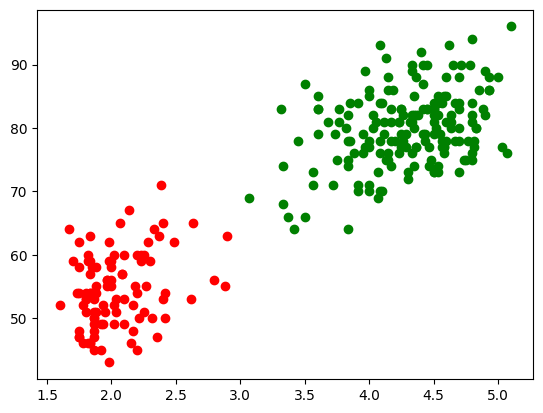

In [31]:
class1 = []
class2 = []
em_pred = []
for n in range(datapoints):
    sum = 0
    for j in range(K):
                #print(f"inj:{i},{n},{j}: {N(x[n,],mu_arr[j],sigma_arr[j])}")
        sum += alpha_arr[j] * N(x[n,],mu_arr[j],sigma_arr[j])
            #print(f"sum: {sum}")
    qz = [0,0]
    for k in range(K):
        qz[k] = alpha_arr[k]*N(x[n,], mu_arr[k], sigma_arr[k]) / sum
        #print(f"(n,j,k):{n},{j},{k}: {qz[k]}")
    if qz[0] > qz[1]:
        class1.append(x[n,])
        em_pred.append(0)
    else:
        class2.append(x[n,])
        em_pred.append(1)

class1 = np.array(class1)
class2 = np.array(class2)

EM_class0 = np.array(class1)
EM_class1 = np.array(class2)
#np.copyto(EM_class0, class1)
#np.copyto(EM_class1, class2)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(class1[:,0],class1[:,1], color = "red")
ax.scatter(class2[:,0],class2[:,1], color = "green")

#### LibSVM
SV_COEFF ABSORBS THE Y VALUE

Flags
-s svm_type : set type of SVM (default 0)

	0 -- C-SVC		(multi-class classification)
	1 -- nu-SVC		(multi-class classification)
	2 -- one-class SVM
	3 -- epsilon-SVR	(regression)
	4 -- nu-SVR		(regression)

-t kernel_type : set type of kernel function (default 2)
	
    0 -- linear: u'*v
	1 -- polynomial: (gamma*u'*v + coef0)^degree
	2 -- radial basis function: exp(-gamma*|u-v|^2)
	3 -- sigmoid: tanh(gamma*u'*v + coef0)
	4 -- precomputed kernel (kernel values in training_set_file)
-d degree : set degree in kernel function (default 3)

-g gamma : set gamma in kernel function (default 1/num_features)

-r coef0 : set coef0 in kernel function (default 0)

-c cost : set the parameter C of C-SVC, epsilon-SVR, and nu-SVR (default 1)

-n nu : set the parameter nu of nu-SVC, one-class SVM, and nu-SVR (default 0.5)

-p epsilon : set the epsilon in loss function of epsilon-SVR (default 0.1)

-m cachesize : set cache memory size in MB (default 100)

-e epsilon : set tolerance of termination criterion (default 0.001)

-h shrinking : whether to use the shrinking heuristics, 0 or 1 (default 1)

-b probability_estimates : whether to train a model for probability estimates, 0 or 1 (default 0)

-wi weight : set the parameter C of class i to weight*C, for C-SVC (default 1)

-v n: n-fold cross validation mode

-q : quiet mode (no outputs)

In [32]:
y = [-1 if temp==0 else temp for temp in em_pred]
y = np.array(y)
x = np.array(x)

len(y)
len(x)

272

In [33]:
prob  = svm_problem(y, x)
param = svm_parameter('-t 0 -c 100000')
m = svm_train(prob, param)
p_labs, p_acc, p_vals = svm_predict(y, x, m)


.*
optimization finished, #iter = 540
nu = 0.000000
obj = -6.531749, rho = 26.174995
nSV = 3, nBSV = 0
Total nSV = 3
Accuracy = 100% (272/272) (classification)


In [34]:
sv = m.get_SV()
sv_coeff = m.get_sv_coef()
sv_i = m.get_sv_indices()
sv_i = [i - 1 for i in sv_i]
print(*(x[i] for i in sv_i))
print(*(y[i] for i in sv_i))
print(sv_i)

sv_x = [i[1] for i in sv]
sv_y = [i[2] for i in sv]

[ 3.067 69.   ] [ 2.383 71.   ] [ 2.9 63. ]
1 -1 -1
[23, 210, 243]


In [35]:
w = np.zeros(2)
for i in range(len(sv_i)):
    w += sv_coeff[i] * x[sv_i[i]]

print(w)

b = 0
for i in range(3):
    b+= y[sv_i[i]] - np.dot(w,x[sv_i[i]])
b = b/3
print(b)

[3.60710454 0.23352615]
-26.175043708903203


In [36]:
def abline(w0,w1,b):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(class1[:,0],class1[:,1], color = "red", s = 10)
    ax.scatter(class2[:,0],class2[:,1], color = "green", s =10)
    ax.scatter(sv_x,sv_y, color = "black",marker = "x", alpha = 1, s = 50)
    x_vals = np.array(ax.get_xlim())
    slope = -w0/w1
    intercept = -b/w1
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals)
    
    intercept = (-b+1)/w1
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, c = "blue", linestyle = "--", alpha = 0.5)

    intercept = (-b-1)/w1
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, c = "blue", linestyle = "--", alpha = 0.5)

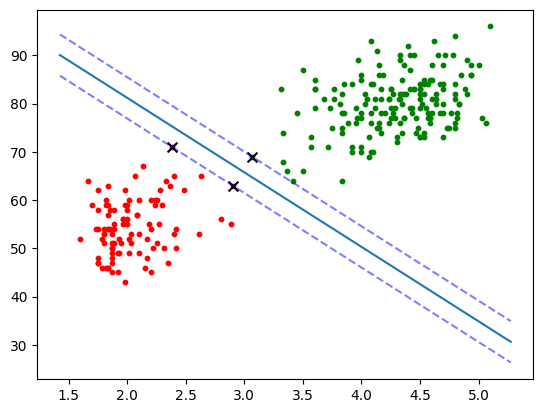

In [37]:
abline(w[0],w[1],b)

#### CVXOPT

Solves an optimisation of the form

min $(1/2)x^TQx + p^Tx$

given: 
$Gx \le h$

$Ax=b$

cvxopt.solvers.qp(Q,p,G,h,A,b)


#### SVM Problem

argmax(f) = argmin(-f)

argmax $f(\mu) = \sum \mu_i - (1/2) \sum\sum \mu_i \mu_j * y_i y_j* k(x_i,x_j) $

argmin $-f(\mu) = -\sum \mu_i + (1/2) \sum\sum \mu_i \mu_j * y_i y_j* k(x_i,x_j) $

given $0 \le \mu \le c$

given $\mu_i y_i = 0$


$p = (-1 ... -1)$

$Q_{ij} = y_iy_jk(x_i,x_j)$

$Y_{ij} = y_i y_j$

$Y_{ij} = y @ y^T$ (matrix multiplication)

$KX_{ij} = k(x_i,x_j)$

$Q = Y * KX$ (element wise multiplication)

$-\mu_i \le 0$

$\mu_i \le c$

(L*2 number of inequalities)

G(2L x L) @ $\mu$(L x 1) $\le$ h(2L x 1)

y (1xL) . $\mu$ (Lx1) = 0

#### KX for linear

Let $x_i$ be a vector for a single datapoint.
Our data will be in the form of

$KX= \begin{bmatrix}x_1^Tx_1 & ... & x_1^Tx_L
\\... &&... \\x_L^Tx_1 & ... & x_L^Tx_L \end{bmatrix}$

$D = [x_1 ... x_L]^T$

$KX = [x_1 ... x_L]^T [x_1^T ... x_L^T]$

$KX = D D^T$

#### KX for Polynomial

$KX = (DD^T + 1)^P$

#### KX for gaussian

$KX_{ij} = exp(-G_{ij}/\sigma^2)$

$G_{ij} = ||x_i-x_j||^2$
$= ||x_i||^2 + ||x_j||^2 - 2 x_i^T x_j$

$J = \begin{bmatrix}|x_1|^2 & ... & |x_L|^2
\\... &&... \\|x_1|^2 & ... & |x_L|^2 \end{bmatrix}$

$J^T = \begin{bmatrix}|x_1|^2 & ... & |x_1|^2
\\... &&... \\|x_L|^2 & ... & |x_L|^2 \end{bmatrix}$

$G = J + J^T -2DD^T$

In [2]:
def linear(X,param):
    return X @ X.T

def polynomial(X,p):
    return (X @ X.T + 1)**p

def gaussian(X,sigma):
    L = len(X)
    j = np.zeros(L)
    for i in range(L):
        j[i] = np.linalg.norm(X[i])**2
    J = np.tile(j,(L,1))
    G = J + J.T - 2*(X@X.T)
    return np.exp(-G/(2*sigma**2))

In [3]:
#param is degree for a linear, gamma for a non linear
def svm_train2(y,X,c,kernel,param):
    L = len(X)
    y.shape = (L,1)
    # (-p)x + (1/2) x^TQx
    KX = kernel(X,param) #LxL
    Y = y @ y.T # LxL
    Q = Y * KX # LxL
    p = -1 * np.ones((L,1)) #Lx1

    # Gx <= h
    G = np.vstack((np.eye(L) * -1, np.eye(L))) #2LxL
    h = np.hstack((np.zeros(L), np.ones(L) * c)) #Lx1
    h.shape = (2*L,1)

    # Ax = b
    A = np.array(y) #(1xL)
    A.shape = (1,L)
    b = np.zeros(1) #(1x1)
    """
    print(f"KX: {KX.shape}")
    print(f"Y: {Y.shape}")
    print(f"Q: {Q.shape}")
    print(f"p: {p.shape}")
    print(f"G: {G.shape}")
    print(f"h: {h.shape}")
    print(f"A: {A.shape}")
    print(f"b: {b.shape}")
"""
    
    Q = matrix(Q, tc = 'd')
    p = matrix(p, tc = 'd')
    G = matrix(G, tc = 'd')
    h = matrix(h, tc = 'd')
    A = matrix(A, tc = 'd')
    b = matrix(b,tc = 'd')
    
    solution = solvers.qp(Q, p, G, h, A, b)
    alphas = np.array(solution['x'])
    print(alphas)
    ind = (alphas > 1e-4).flatten()
    sv = X[ind]
    sv_y = y[ind]
    alphas = alphas[ind]
    #print(solution['x'])
    #print(ind)
    return (ind,alphas)
    

In [4]:
def get_hyperplane(y,x,ind,mu):
    sv_i = [i for i in range(len(ind)) if ind[i]]
    L = len(x) # datapoints
    n = len(x[0]) # features
    sv_n = len(sv_i) # support vector count
    w = np.zeros(n)
    for i in range(sv_n):
        w += mu[i] * x[sv_i[i]] * y[sv_i[i]]
    b = 0
    for i in range(sv_n):
        b+= y[sv_i[i]] - np.dot(w,x[sv_i[i]])
    b = b/sv_n
    return (w,b)
    

In [5]:
def svm_predict2(y,x,w,b):
    L = len(x)
    pred= 0
    correct = 0
    for i in range(L):
        temp = np.dot(x[i],w) + b
        if temp >= 0:
            pred = +1
        else:
            pred = -1
        if y[i]==pred:
            correct+=1
    acc = correct*100/L
    print(f"CVXOPT Accuracy = {acc}% ({correct}/{L})")
    return acc

In [42]:
(ind, mu) = svm_train2(y, x, 100, linear, 0)

     pcost       dcost       gap    pres   dres
 0:  6.0429e+02 -1.1256e+06  3e+06  5e-01  7e-10
 1:  2.8883e+03 -1.6556e+05  3e+05  4e-02  5e-10
 2:  1.9834e+03 -3.7127e+04  6e+04  7e-03  2e-10
 3:  9.1829e+02 -7.7115e+03  1e+04  1e-03  7e-11
 4:  3.3006e+02 -7.2106e+02  1e+03  7e-05  3e-11
 5:  4.9642e+01 -7.7472e+01  1e+02  5e-07  2e-11
 6:  4.1543e+00 -1.3577e+01  2e+01  9e-16  1e-11
 7:  3.9945e-02 -7.4878e+00  8e+00  1e-16  5e-12
 8: -1.5588e+00 -8.8517e+00  7e+00  8e-16  1e-11
 9: -1.6023e+00 -8.5870e+00  7e+00  3e-15  1e-11
10: -2.1736e+00 -9.1712e+00  7e+00  2e-15  9e-12
11: -3.0645e+00 -8.8882e+00  6e+00  1e-15  9e-12
12: -3.0837e+00 -8.7502e+00  6e+00  3e-15  9e-12
13: -6.1775e+00 -6.8567e+00  7e-01  3e-15  1e-11
14: -6.5206e+00 -6.5318e+00  1e-02  1e-15  1e-11
15: -6.5259e+00 -6.5260e+00  1e-04  8e-16  1e-11
16: -6.5260e+00 -6.5260e+00  1e-06  3e-15  1e-11
Optimal solution found.


In [43]:
(w,b) = get_hyperplane(y,x,ind,mu)
print(w)
print(b)

[3.60522583 0.23295536]
[-26.13119108]


## Metrics

In [15]:
def confusion_matrix(y_pred, y):
    y_pred_series = pd.Series(y_pred, name = "Pred")
    y_series = pd.Series(y,name = "Actual")
    cm = pd.crosstab(y_pred_series, y_series)
    return cm

In [16]:
def F1(cm):
    TP = np.diag(cm)
    FP = cm.sum(axis = 1) - TP
    FN = cm.sum(axis = 0) - TP
    print(f"TP:{TP}")
    print()
    print(f"FP:{FP}")
    print()
    print(f"FN:{FN}")
    print()
    precision = TP/(TP+FP)
    print(f"precision: {precision}")
    print()
    recall = TP/(TP+FN)
    
    print(f"recall: {recall}")
    F1 = (2*precision*recall)/(precision+recall)
    return F1

## Binary Classification

In [6]:
def split(train_percent,test_percent):
    
    val_percent = 1 - train_percent - test_percent
    n = len(y)
    train_n = int(n*train_percent)
    test_n = int(n*test_percent)
    
    x_train = x[:train_n,:]
    y_train = y[:train_n]
    
    x_test = x[train_n:train_n+test_n, :]
    y_test = y[train_n:train_n+test_n]

    x_val = x[train_n+test_n:,:]
    y_val = y[train_n+test_n:]
    return (x_train, y_train, x_test, y_test, x_val, y_val)

In [7]:
input = pd.read_csv("binary_classification_data_group_19_train.txt", delimiter = "\t")
x = input.iloc[:,0:10]
y = input.iloc[:,10]
x = np.array(x)
y = [-1 if i==0 else 1 for i in y]
y = np.array(y)
x_train,y_train,x_test,y_test,x_val,y_val = split(0.6,0.2)

### Linear Kernel

In [59]:
prob = svm_problem(y_train,x_train)
param = svm_parameter('-t 0')
model = svm_train(prob,param)

In [60]:
p_labs, p_acc, p_vals = svm_predict(y_test, x_test, model)

Accuracy = 67.75% (1897/2800) (classification)


In [61]:
prob = svm_problem(y,x)
param = svm_parameter('-t 0')
model2 = svm_train(prob,param)

In [62]:
p_labs, p_acc, p_vals = svm_predict(y_test, x_test, model2)

Accuracy = 67.8571% (1900/2800) (classification)


In [8]:
(ind2, mu2) = svm_train2(y_train, x_train, 1, linear, 0)
(w,b) = get_hyperplane(y_train,x_train,ind2,mu2)
acc = svm_predict2(y_test, x_test, w, b)

     pcost       dcost       gap    pres   dres
 0: -6.8148e+03 -2.7236e+04  1e+05  3e+00  4e-13
 1: -4.6547e+03 -2.0567e+04  3e+04  4e-01  4e-13
 2: -4.7860e+03 -6.9026e+03  2e+03  5e-04  3e-13
 3: -5.6034e+03 -6.2148e+03  6e+02  1e-04  3e-13
 4: -5.7789e+03 -6.0668e+03  3e+02  4e-05  3e-13
 5: -5.8541e+03 -6.0005e+03  1e+02  2e-05  3e-13
 6: -5.8893e+03 -5.9689e+03  8e+01  1e-05  3e-13
 7: -5.9132e+03 -5.9471e+03  3e+01  4e-06  4e-13
 8: -5.9221e+03 -5.9387e+03  2e+01  2e-06  3e-13
 9: -5.9262e+03 -5.9349e+03  9e+00  7e-07  3e-13
10: -5.9290e+03 -5.9323e+03  3e+00  2e-07  4e-13
11: -5.9300e+03 -5.9313e+03  1e+00  8e-09  4e-13
12: -5.9305e+03 -5.9308e+03  2e-01  1e-09  4e-13
13: -5.9306e+03 -5.9307e+03  1e-01  4e-10  4e-13
14: -5.9306e+03 -5.9307e+03  4e-02  6e-11  4e-13
15: -5.9307e+03 -5.9307e+03  8e-03  9e-12  4e-13
16: -5.9307e+03 -5.9307e+03  8e-04  9e-13  4e-13
Optimal solution found.
[[4.40697083e-08]
 [9.99999969e-01]
 [9.99999972e-01]
 ...
 [9.99999971e-01]
 [8.21618268e-08]


LibSVM Accuracy (trained on full data): 67.8571%

CVXOPT Accuracy: 67.8214%

### Polynomial Kernel

In [63]:
poly_acc = np.zeros((8,8)) # [C,degree]
for i in range(8):
    for j in range(8):
        print(f"c = 10^{4-i}, deg = {j}")
        param_i = svm_parameter(f"-t 1 -c {10**(4-i)} -d {j}")
        model_i = svm_train(prob, param_i)
        labs_ij, acc_ij, vals_ij = svm_predict(y_val, x_val, model_i)
        poly_acc[i][j] = acc_ij[0]

c = 10^4, deg = 0
Accuracy = 49.5357% (1387/2800) (classification)
c = 10^4, deg = 1
Accuracy = 68.3214% (1913/2800) (classification)
c = 10^4, deg = 2
Accuracy = 74.25% (2079/2800) (classification)
c = 10^4, deg = 3
Accuracy = 76.9643% (2155/2800) (classification)
c = 10^4, deg = 4
Accuracy = 79.1786% (2217/2800) (classification)
c = 10^4, deg = 5
Accuracy = 85.4286% (2392/2800) (classification)
c = 10^4, deg = 6
Accuracy = 94% (2632/2800) (classification)
c = 10^4, deg = 7
Accuracy = 98.2857% (2752/2800) (classification)
c = 10^3, deg = 0
Accuracy = 49.5357% (1387/2800) (classification)
c = 10^3, deg = 1
Accuracy = 69.3929% (1943/2800) (classification)
c = 10^3, deg = 2
Accuracy = 74.6071% (2089/2800) (classification)
c = 10^3, deg = 3
Accuracy = 77.9643% (2183/2800) (classification)
c = 10^3, deg = 4
Accuracy = 79.9643% (2239/2800) (classification)
c = 10^3, deg = 5
Accuracy = 85.6071% (2397/2800) (classification)
c = 10^3, deg = 6
Accuracy = 92.5357% (2591/2800) (classification)
c 

In [64]:
poly_acc_plot = []
for i in range(8):
    for j in range(8):
        poly_acc_plot.append([10**(4-i),j,poly_acc[i][j]])
poly_acc_plot = np.array(poly_acc_plot)

Text(0, 0.5, 'Degree')

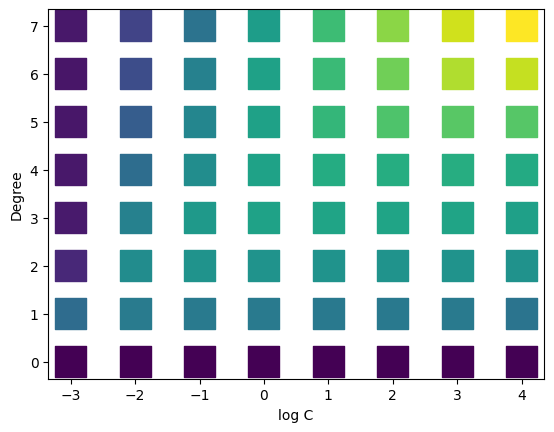

In [65]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(np.log10(poly_acc_plot[:,0]), poly_acc_plot[:,1], marker = "s", s = 500, alpha = 1, c = poly_acc_plot[:,2])
ax.set_xlabel("log C")
ax.set_ylabel("Degree")

Optimal Hyperparameters
Degree: 7, C = 10^4

In [71]:
prob = svm_problem(y,x)
param = svm_parameter(f"-t 1 -c {10**4} -d 7")
model = svm_train(prob, param)
labs_ij, acc_ij, vals_ij = svm_predict(y_test, x_test, model)

Accuracy = 97.3214% (2725/2800) (classification)


In [9]:
(ind2, mu2) = svm_train2(y_train, x_train, 10000, polynomial, 7)
(w,b) = get_hyperplane(y_train,x_train,ind2,mu2)
acc = svm_predict2(y_test, x_test, w, b)

     pcost       dcost       gap    pres   dres
 0:  1.4127e+08 -1.2068e+10  2e+10  2e-02  2e-06
 1:  6.9905e+07 -2.3413e+09  4e+09  3e-03  1e-06
 2:  3.2961e+07 -7.7728e+08  1e+09  8e-04  7e-07
 3:  1.7059e+07 -3.1615e+08  5e+08  2e-04  4e-07
 4:  7.3777e+06 -1.0122e+08  2e+08  6e-05  2e-07
 5:  4.3283e+06 -5.1075e+07  7e+07  2e-05  1e-07
 6:  2.2635e+06 -2.2412e+07  3e+07  7e-06  8e-08
 7:  1.4567e+06 -1.2431e+07  2e+07  2e-06  5e-08
 8:  8.5502e+05 -6.3561e+06  9e+06  9e-07  3e-08
 9:  5.1099e+05 -3.4825e+06  5e+06  4e-07  2e-08


IOStream.flush timed out


10:  3.0183e+05 -1.8487e+06  2e+06  2e-07  1e-08
11:  2.0117e+05 -1.1513e+06  1e+06  9e-08  9e-09
12:  1.2881e+05 -6.8179e+05  9e+05  4e-08  7e-09
13:  7.9678e+04 -3.5388e+05  4e+05  1e-08  6e-09
14:  1.2585e+04 -1.5396e+04  3e+04  9e-11  4e-09
15:  1.7980e+03 -1.9782e+03  4e+03  9e-16  2e-09
16:  2.5528e+02 -2.8878e+02  5e+02  1e-15  6e-10
17:  3.5582e+01 -4.2296e+01  8e+01  4e-16  2e-10
18:  5.8665e+00 -8.0772e+00  1e+01  2e-16  9e-11
19:  1.0110e+00 -2.7652e+00  4e+00  2e-16  4e-11
20:  1.2523e-01 -1.2695e+00  1e+00  2e-16  2e-11
21: -1.8945e-01 -6.9749e-01  5e-01  2e-16  1e-11
22: -2.8566e-01 -4.8872e-01  2e-01  2e-16  1e-11
23: -3.2725e-01 -3.8763e-01  6e-02  2e-16  1e-11
24: -3.3940e-01 -3.5353e-01  1e-02  2e-16  1e-11
25: -3.4301e-01 -3.4429e-01  1e-03  2e-16  1e-11
26: -3.4339e-01 -3.4346e-01  7e-05  2e-16  1e-11
27: -3.4341e-01 -3.4341e-01  2e-06  2e-16  1e-11
28: -3.4341e-01 -3.4341e-01  5e-08  2e-16  1e-11
Optimal solution found.
[[2.05335538e-13]
 [6.85170439e-14]
 [5.83182

In [17]:
cm = confusion_matrix(labs_ij,y_test)
cm

Actual,0,1
Pred,,
0.0,1423,70
1.0,5,1302


In [32]:
f1c = F1(cm)
print(f"\nClass-wise F1 Score {f1c}")

TP:[1423 1302]

FP:Pred
0.0    70
1.0     5
dtype: int64

FN:Actual
0     5
1    70
dtype: int64

precision: Pred
0.0    0.953115
1.0    0.996174
dtype: float64

recall: Actual
0    0.996499
1    0.948980
dtype: float64

Class-wise F1 Score Pred
0.0    0.974324
1.0    0.972004
dtype: float64


### Gaussian Kernel

In [6]:
prob = svm_problem(y_train, x_train)
rbf_acc = np.zeros((8,8)) # [C,degree]
for i in range(8):
    for j in range(8):
        print(f"c = 2^{4-i}, gamma = 2^{4-j}")
        param_i = svm_parameter(f"-t 2 -c {2**(4-i)} -g {2**(4-j)}")
        model_i = svm_train(prob, param_i)
        labs_ij, acc_ij, vals_ij = svm_predict(y_val, x_val, model_i)
        rbf_acc[i][j] = acc_ij[0]

c = 2^4, gamma = 2^4
...........*.......*
optimization finished, #iter = 18473
nu = 0.062495
obj = -4199.613881, rho = 0.006657
nSV = 8400, nBSV = 0
Total nSV = 8400
Accuracy = 49.7143% (1392/2800) (classification)
c = 2^4, gamma = 2^3
...........*.*
optimization finished, #iter = 12610
nu = 0.062407
obj = -4193.805189, rho = 0.006198
nSV = 8400, nBSV = 0
Total nSV = 8400
Accuracy = 51.3929% (1439/2800) (classification)
c = 2^4, gamma = 2^2
......*.....*
optimization finished, #iter = 11295
nu = 0.061073
obj = -4104.070149, rho = -0.003203
nSV = 8400, nBSV = 0
Total nSV = 8400
Accuracy = 69.25% (1939/2800) (classification)
c = 2^4, gamma = 2^1
..........*....*
optimization finished, #iter = 14987
nu = 0.056214
obj = -3777.606986, rho = -0.039682
nSV = 8255, nBSV = 0
Total nSV = 8255
Accuracy = 73.0357% (2045/2800) (classification)
c = 2^4, gamma = 2^0
...............*......*
optimization finished, #iter = 21164
nu = 0.073351
obj = -4938.160559, rho = -0.063487
nSV = 6871, nBSV = 4
Tota

In [7]:
rbf_acc_plot = []
for i in range(8):
    for j in range(8):
        rbf_acc_plot.append([2**(4-i),2**(4-j),rbf_acc[i][j]])
rbf_acc_plot = np.array(rbf_acc_plot)
optimal = max(rbf_acc_plot[:,2])
for i in range(len(rbf_acc_plot)):
    if optimal == rbf_acc_plot[i,2]:
        print(rbf_acc_plot[i])

[ 8.          0.125      79.10714286]


Text(0, 0.5, 'lg Gamma')

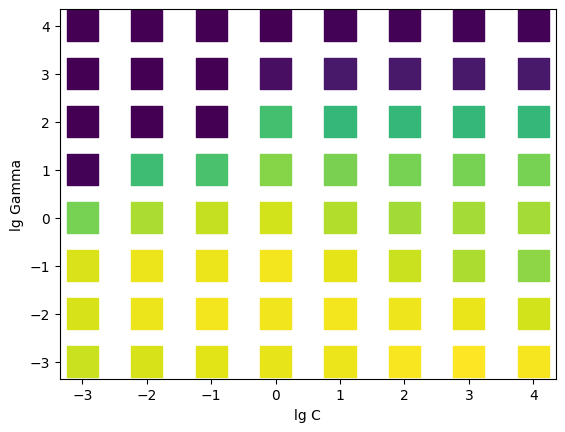

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(np.log2(rbf_acc_plot[:,0]), np.log2(rbf_acc_plot[:,1]), marker = "s", s = 500, alpha = 1, c = rbf_acc_plot[:,2])
ax.set_xlabel("lg C")
ax.set_ylabel("lg Gamma")

Optimal Hyperparameters C = 8, Gamma = 0.125 79.10%

In [33]:
prob = svm_problem(y,x)
param = svm_parameter(f"-t 2 -c 8 -g 0.125")
model = svm_train(prob, param)
labs_ij, acc_ij, vals_ij = svm_predict(y_test, x_test, model)

Accuracy = 82.3214% (2305/2800) (classification)


In [10]:
(ind2, mu2) = svm_train2(y_train, x_train, 10000, polynomial, 7)
(w,b) = get_hyperplane(y_train,x_train,ind2,mu2)
acc = svm_predict2(y_test, x_test, w, b)

     pcost       dcost       gap    pres   dres
 0:  1.4127e+08 -1.2068e+10  2e+10  2e-02  2e-06
 1:  6.9905e+07 -2.3413e+09  4e+09  3e-03  1e-06
 2:  3.2961e+07 -7.7728e+08  1e+09  8e-04  7e-07
 3:  1.7059e+07 -3.1615e+08  5e+08  2e-04  4e-07


IOStream.flush timed out


 4:  7.3777e+06 -1.0122e+08  2e+08  6e-05  2e-07
 5:  4.3283e+06 -5.1075e+07  7e+07  2e-05  1e-07
 6:  2.2635e+06 -2.2412e+07  3e+07  7e-06  8e-08
 7:  1.4567e+06 -1.2431e+07  2e+07  2e-06  5e-08
 8:  8.5502e+05 -6.3561e+06  9e+06  9e-07  3e-08
 9:  5.1099e+05 -3.4825e+06  5e+06  4e-07  2e-08
10:  3.0183e+05 -1.8487e+06  2e+06  2e-07  1e-08


IOStream.flush timed out


11:  2.0117e+05 -1.1513e+06  1e+06  9e-08  9e-09
12:  1.2881e+05 -6.8179e+05  9e+05  4e-08  7e-09
13:  7.9678e+04 -3.5388e+05  4e+05  1e-08  6e-09
14:  1.2585e+04 -1.5396e+04  3e+04  9e-11  4e-09
15:  1.7980e+03 -1.9782e+03  4e+03  9e-16  2e-09
16:  2.5528e+02 -2.8878e+02  5e+02  1e-15  6e-10
17:  3.5582e+01 -4.2296e+01  8e+01  4e-16  2e-10
18:  5.8665e+00 -8.0772e+00  1e+01  2e-16  9e-11
19:  1.0110e+00 -2.7652e+00  4e+00  2e-16  4e-11
20:  1.2523e-01 -1.2695e+00  1e+00  2e-16  2e-11
21: -1.8945e-01 -6.9749e-01  5e-01  2e-16  1e-11
22: -2.8566e-01 -4.8872e-01  2e-01  2e-16  1e-11
23: -3.2725e-01 -3.8763e-01  6e-02  2e-16  1e-11
24: -3.3940e-01 -3.5353e-01  1e-02  2e-16  1e-11
25: -3.4301e-01 -3.4429e-01  1e-03  2e-16  1e-11
26: -3.4339e-01 -3.4346e-01  7e-05  2e-16  1e-11
27: -3.4341e-01 -3.4341e-01  2e-06  2e-16  1e-11
28: -3.4341e-01 -3.4341e-01  5e-08  2e-16  1e-11
Optimal solution found.
[[2.05335538e-13]
 [6.85170439e-14]
 [5.83182257e-06]
 ...
 [5.15558076e-14]
 [5.66434736e-15]

In [34]:
cm = confusion_matrix(labs_ij,y_test)
cm

Actual,0,1
Pred,,
0.0,1207,274
1.0,221,1098


In [35]:
f1c = F1(cm)
print(f"\nClass-wise F1 Score {f1c}")

TP:[1207 1098]

FP:Pred
0.0    274
1.0    221
dtype: int64

FN:Actual
0    221
1    274
dtype: int64

precision: Pred
0.0    0.814990
1.0    0.832449
dtype: float64

recall: Actual
0    0.845238
1    0.800292
dtype: float64

Class-wise F1 Score Pred
0.0    0.829838
1.0    0.816054
dtype: float64


## Multiclass Classification

In [24]:
input = pd.read_csv("multi_class_classification_data_group_19_train.txt", delimiter = "\t")
x = input.iloc[:,0:25]
y = input.iloc[:,25]

In [25]:
x = np.array(x)
y = np.array(y)
x_train,y_train,x_test,y_test,x_val,y_val = split(0.6,0.2)

In [ ]:
prob = svm_problem(y_train, x_train)

### Polynomial Kernel

In [13]:
poly_acc = np.zeros((8,8)) # [C,degree]
for i in range(8):
    for j in range(8):
        print(f"c = 2^{4-i}, deg = {j}")
        param_i = svm_parameter(f"-t 1 -c {2**(4-i)} -d {j}")
        model_i = svm_train(prob, param_i)
        labs_ij, acc_ij, vals_ij = svm_predict(y_val, x_val, model_i)
        poly_acc[i][j] = acc_ij[0]

c = 2^4, deg = 0
Accuracy = 9.92857% (695/7000) (classification)
c = 2^4, deg = 1
Accuracy = 30.4143% (2129/7000) (classification)
c = 2^4, deg = 2
Accuracy = 46.5714% (3260/7000) (classification)
c = 2^4, deg = 3
Accuracy = 54.5429% (3818/7000) (classification)
c = 2^4, deg = 4
Accuracy = 56.0571% (3924/7000) (classification)
c = 2^4, deg = 5
Accuracy = 56.2571% (3938/7000) (classification)
c = 2^4, deg = 6
Accuracy = 54.9714% (3848/7000) (classification)
c = 2^4, deg = 7
Accuracy = 51.9857% (3639/7000) (classification)
c = 2^3, deg = 0
Accuracy = 9.92857% (695/7000) (classification)
c = 2^3, deg = 1
Accuracy = 30.4143% (2129/7000) (classification)
c = 2^3, deg = 2
Accuracy = 46.6% (3262/7000) (classification)
c = 2^3, deg = 3
Accuracy = 55.4857% (3884/7000) (classification)
c = 2^3, deg = 4
Accuracy = 57.1429% (4000/7000) (classification)
c = 2^3, deg = 5
Accuracy = 56.3857% (3947/7000) (classification)
c = 2^3, deg = 6
Accuracy = 54.4429% (3811/7000) (classification)
c = 2^3, deg = 

In [32]:
poly_acc_plot = []
for i in range(8):
    for j in range(8):
        poly_acc_plot.append([10**(4-i),j,poly_acc[i][j]])
poly_acc_plot = np.array(poly_acc_plot)
optimal = max(poly_acc_plot[:,2])
for i in range(len(poly_acc_plot)):
    if optimal == poly_acc_plot[i,2]:
        print(poly_acc_plot[i])

[100.           4.          57.37142857]


Optimal Value

C = 100, Degree = 4, Accuracy = 57.37%

Text(0, 0.5, 'Degree')

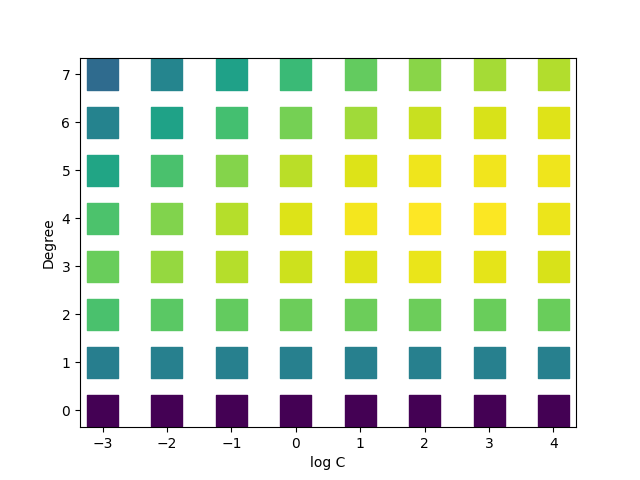

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(np.log10(poly_acc_plot[:,0]), poly_acc_plot[:,1], marker = "s", s = 500, alpha = 1, c = poly_acc_plot[:,2])
ax.set_xlabel("log C")
ax.set_ylabel("Degree")

In [26]:
prob = svm_problem(y_train,x_train)
param = svm_parameter(f"-t 1 -c 100 -d 4 -q")
model = svm_train(prob, param)
labs_ij, acc_ij, vals_ij = svm_predict(y_test, x_test, model)

Accuracy = 51.7214% (7241/14000) (classification)


In [27]:
cm = confusion_matrix(labs_ij,y_test)
cm

Actual,0,1,2,3,4,5,6,7,8,9
Pred,,,,,,,,,,
0.0,724,91,93,68,70,71,77,54,81,63
1.0,69,688,58,74,47,63,60,43,75,78
2.0,81,56,680,65,47,63,61,57,86,57
3.0,69,95,74,754,60,66,63,69,65,68
4.0,68,48,65,52,831,46,77,33,72,38
5.0,107,86,77,58,82,608,118,85,61,85
6.0,97,99,80,81,107,139,735,93,76,83
7.0,63,69,62,65,34,73,69,744,50,78
8.0,115,111,114,97,80,105,97,87,702,78


In [28]:
f1c = F1(cm)
print(f"\nClass-wise F1 Score {f1c}")

TP:[724 688 680 754 831 608 735 744 702 775]

FP:Pred
0.0    668
1.0    567
2.0    573
3.0    629
4.0    499
5.0    759
6.0    855
7.0    563
8.0    884
9.0    762
dtype: int64

FN:Actual
0    737
1    737
2    715
3    641
4    596
5    731
6    693
7    634
8    647
9    628
dtype: int64

precision: Pred
0.0    0.520115
1.0    0.548207
2.0    0.542698
3.0    0.545192
4.0    0.624812
5.0    0.444770
6.0    0.462264
7.0    0.569243
8.0    0.442623
9.0    0.504229
dtype: float64

recall: Actual
0    0.495551
1    0.482807
2    0.487455
3    0.540502
4    0.582341
5    0.454070
6    0.514706
7    0.539913
8    0.520385
9    0.552388
dtype: float64

Class-wise F1 Score Pred
0.0    0.507536
1.0    0.513433
2.0    0.513595
3.0    0.542837
4.0    0.602829
5.0    0.449372
6.0    0.487078
7.0    0.554190
8.0    0.478365
9.0    0.527211
dtype: float64


### Gaussian Kernel

In [9]:
prob = svm_problem(y_train, x_train)
rbf_acc = np.zeros((8,8)) # [C,degree]
for i in range(8):
    for j in range(8):
        print(f"c = 2^{4-i}, gamma = 2^{4-j}")
        param_i = svm_parameter(f"-t 2 -c {2**(4-i)} -g {2**(4-j)}")
        model_i = svm_train(prob, param_i)
        labs_ij, acc_ij, vals_ij = svm_predict(y_val, x_val, model_i)
        rbf_acc[i][j] = acc_ij[0]

c = 2^4, gamma = 2^4
........*...........*
optimization finished, #iter = 19251
nu = 0.062493
obj = -4956.960005, rho = 0.002824
nSV = 9914, nBSV = 0
.........*.......*
optimization finished, #iter = 16506
nu = 0.062488
obj = -4925.436739, rho = -0.003553
nSV = 9851, nBSV = 0
..............*...........*
optimization finished, #iter = 25491
nu = 0.062493
obj = -4889.936374, rho = -0.010735
nSV = 9781, nBSV = 0
........*...........*
optimization finished, #iter = 19608
nu = 0.062499
obj = -4928.457281, rho = -0.002942
nSV = 9857, nBSV = 0
.......*.......*
optimization finished, #iter = 14772
nu = 0.062500
obj = -4933.481578, rho = -0.001926
nSV = 9867, nBSV = 0
.........*.....*
optimization finished, #iter = 14955
nu = 0.062498
obj = -4923.926468, rho = -0.003859
nSV = 9848, nBSV = 0
...........*........*
optimization finished, #iter = 19985
nu = 0.062498
obj = -4914.839838, rho = -0.005697
nSV = 9830, nBSV = 0
..............*.*
optimization finished, #iter = 15870
nu = 0.062488
obj = -4

In [10]:
rbf_acc_plot = []
for i in range(8):
    for j in range(8):
        rbf_acc_plot.append([2**(4-i),2**(4-j),rbf_acc[i][j]])
rbf_acc_plot = np.array(rbf_acc_plot)
optimal = max(rbf_acc_plot[:,2])
for i in range(len(rbf_acc_plot)):
    if optimal == rbf_acc_plot[i,2]:
        print(rbf_acc_plot[i])

[ 2.          0.125      60.42857143]


Text(0, 0.5, 'lg Gamma')

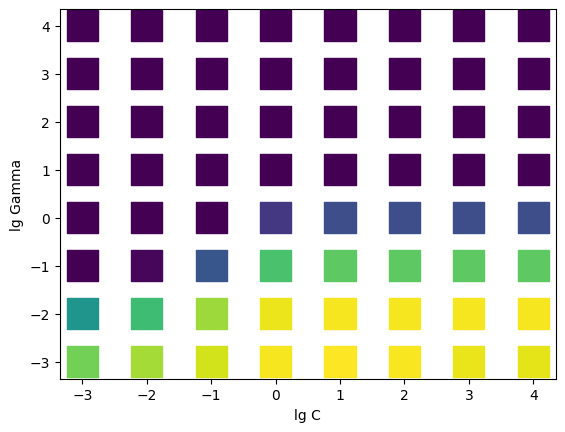

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(np.log2(rbf_acc_plot[:,0]), np.log2(rbf_acc_plot[:,1]), marker = "s", s = 500, alpha = 1, c = rbf_acc_plot[:,2])
ax.set_xlabel("lg C")
ax.set_ylabel("lg Gamma")

Optimal Value
C = 2
gamma = 0.125
Validation Accuracy = 60.42%

In [29]:
prob = svm_problem(y_train,x_train)
param = svm_parameter(f"-t 2 -c 2 -g 0.125")
model = svm_train(prob, param)
labs_ij, acc_ij, vals_ij = svm_predict(y_test, x_test, model)

.........*....*
optimization finished, #iter = 13765
nu = 0.301010
obj = -3029.947178, rho = -0.061452
nSV = 5066, nBSV = 943
........*....*
optimization finished, #iter = 12858
nu = 0.288550
obj = -2887.954748, rho = -0.138589
nSV = 4836, nBSV = 938
........*....*
optimization finished, #iter = 12665
nu = 0.282518
obj = -2799.918842, rho = 0.041246
nSV = 4784, nBSV = 868
.........*....*
optimization finished, #iter = 13796
nu = 0.321958
obj = -3210.501275, rho = -0.107683
nSV = 5135, nBSV = 1057
.........*....*
optimization finished, #iter = 13185
nu = 0.304113
obj = -3047.215474, rho = 0.181740
nSV = 5154, nBSV = 951
.........*....*
optimization finished, #iter = 13256
nu = 0.306689
obj = -3048.757375, rho = -0.009791
nSV = 5012, nBSV = 996
.........*....*
optimization finished, #iter = 13872
nu = 0.327083
obj = -3320.172759, rho = -0.220150
nSV = 5095, nBSV = 1150
........*...*
optimization finished, #iter = 11939
nu = 0.259979
obj = -2541.060429, rho = -0.198159
nSV = 4451, nBSV = 

In [30]:
cm = confusion_matrix(labs_ij,y_test)
cm

Actual,0,1,2,3,4,5,6,7,8,9
Pred,,,,,,,,,,
0.0,840,85,83,71,50,73,72,53,67,52
1.0,68,771,55,55,35,47,66,42,70,66
2.0,79,63,810,73,44,61,64,54,83,56
3.0,56,66,71,842,40,64,49,57,61,66
4.0,61,52,60,47,955,54,68,30,52,27
5.0,82,84,65,48,69,715,104,84,56,88
6.0,73,76,61,60,74,104,790,57,50,56
7.0,60,63,50,48,40,69,61,841,45,69
8.0,88,93,73,85,66,79,75,74,790,64


In [31]:
f1c = F1(cm)
print(f"\nClass-wise F1 Score {f1c}")

TP:[840 771 810 842 955 715 790 841 790 859]

FP:Pred
0.0    606
1.0    504
2.0    577
3.0    530
4.0    451
5.0    680
6.0    611
7.0    505
8.0    697
9.0    626
dtype: int64

FN:Actual
0    621
1    654
2    585
3    553
4    472
5    624
6    638
7    537
8    559
9    544
dtype: int64

precision: Pred
0.0    0.580913
1.0    0.604706
2.0    0.583994
3.0    0.613703
4.0    0.679232
5.0    0.512545
6.0    0.563883
7.0    0.624814
8.0    0.531271
9.0    0.578451
dtype: float64

recall: Actual
0    0.574949
1    0.541053
2    0.580645
3    0.603584
4    0.669236
5    0.533981
6    0.553221
7    0.610305
8    0.585619
9    0.612259
dtype: float64

Class-wise F1 Score Pred
0.0    0.577915
1.0    0.571111
2.0    0.582315
3.0    0.608601
4.0    0.674197
5.0    0.523043
6.0    0.558501
7.0    0.617474
8.0    0.557123
9.0    0.594875
dtype: float64


## Kuzushiji-MNIST

In [3]:
img_test = np.load("kmnist-test-imgs.npz")
label_test = np.load("kmnist-test-labels.npz")
img_train = np.load("kmnist-train-imgs.npz")
label_train = np.load("kmnist-train-labels.npz")
img_test = img_test['arr_0']
label_test = label_test['arr_0']
img_train = img_train['arr_0']
label_train = label_train['arr_0']

In [4]:
test_n = len(label_test)
train_n = len(label_train)

print(test_n)
print(train_n)

10000
60000


In [5]:
y_train = label_train
y_test = label_test
x_test = np.zeros((10000,784))
x_train = np.zeros((60000,784))
for i in range(test_n):
    x_test[i] = img_test[i].reshape(28*28)
for i in range(train_n):
    x_train[i] = img_train[i].reshape(28*28)

### Gaussian Kernel

In [9]:
prob = svm_problem(y_train, x_train)
rbf_acc = np.zeros((5,5)) # [C,degree]
for i in range(5):
    for j in range(5):
        print(f"c = 10^{i+1}, gamma = 10^{2-j}")
        param_i = svm_parameter(f"-t 2 -c {10**(i+1)} -g {10**(2-j)} -q")
        model_i = svm_train(prob, param_i)
        labs_ij, acc_ij, vals_ij = svm_predict(y_test, x_test, model_i)
        rbf_acc[i][j] = acc_ij[0]

c = 10^1, gamma = 10^2
Accuracy = 10% (1000/10000) (classification)
c = 10^1, gamma = 10^1
Accuracy = 10% (1000/10000) (classification)
c = 10^1, gamma = 10^0
Accuracy = 10% (1000/10000) (classification)
c = 10^1, gamma = 10^-1
Accuracy = 10% (1000/10000) (classification)
c = 10^1, gamma = 10^-2
Accuracy = 10% (1000/10000) (classification)
c = 10^2, gamma = 10^2
Accuracy = 10% (1000/10000) (classification)
c = 10^2, gamma = 10^1
Accuracy = 10% (1000/10000) (classification)
c = 10^2, gamma = 10^0
Accuracy = 10% (1000/10000) (classification)
c = 10^2, gamma = 10^-1
Accuracy = 10% (1000/10000) (classification)
c = 10^2, gamma = 10^-2
Accuracy = 10% (1000/10000) (classification)
c = 10^3, gamma = 10^2
Accuracy = 10% (1000/10000) (classification)
c = 10^3, gamma = 10^1
Accuracy = 10% (1000/10000) (classification)
c = 10^3, gamma = 10^0
Accuracy = 10% (1000/10000) (classification)
c = 10^3, gamma = 10^-1
Accuracy = 10% (1000/10000) (classification)
c = 10^3, gamma = 10^-2
Accuracy = 10% (100

In [11]:
rbf_acc_plot = []
for i in range(4):
    for j in range(4):
        rbf_acc_plot.append([2**(2-i),2**(2-j),rbf_acc[i][j]])
rbf_acc_plot = np.array(rbf_acc_plot)
optimal = max(rbf_acc_plot[:,2])
for i in range(len(rbf_acc_plot)):
    if optimal == rbf_acc_plot[i,2]:
        print(rbf_acc_plot[i])

[ 4.  4. 10.]
[ 4.  2. 10.]
[ 4.  1. 10.]
[ 4.   0.5 10. ]
[ 2.  4. 10.]
[ 2.  2. 10.]
[ 2.  1. 10.]
[ 2.   0.5 10. ]
[ 1.  4. 10.]
[ 1.  2. 10.]
[ 1.  1. 10.]
[ 1.   0.5 10. ]
[ 0.5  4.  10. ]
[ 0.5  2.  10. ]
[ 0.5  1.  10. ]
[ 0.5  0.5 10. ]


Text(0, 0.5, 'lg Gamma')

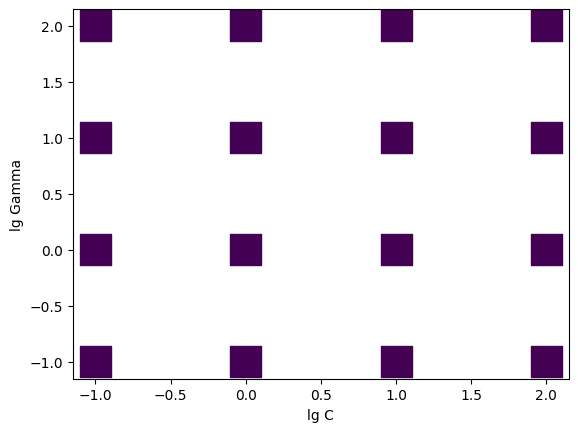

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(np.log2(rbf_acc_plot[:,0]), np.log2(rbf_acc_plot[:,1]), marker = "s", s = 500, alpha = 1, c = rbf_acc_plot[:,2])
ax.set_xlabel("lg C")
ax.set_ylabel("lg Gamma")

# Multilayer Perceptron - Classification

Experiments Run
* Ran MLP with two loss functions, cross-entropy and squared error
* tried layers of sizes 2,3 and 4 with different learning rates
* kept batch_size = 1 for faster convergence.

In [37]:
class MLP:
    def __init__(self, layer_sizes, loss_function='CE', seed=None):
    
        self.layer_sizes = layer_sizes
        np.random.seed(seed) if seed else None
        self.weights = [np.random.randn(n, m) for m, n in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(1, n) for n in layer_sizes[1:]]
        self.loss_function = loss_function
        self.sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))
        self.sigmoid_prime = lambda z: self.sigmoid(z) * (1 - self.sigmoid(z))
        
    def softmax(self,a):
        x = a.shape[0]
        y = a.shape[1]
        c = np.zeros((x,y))
        sum = 0
        for i in range(x):
            sum = np.sum(np.exp(a[i]))
            for j in range(y):
                c[i,j] = np.exp(a[i,j])/sum
        #print("a in last layer:",c)
        #print("shape of a:",c.shape)
        return c
                
            
        

    def forward(self, x,n):
        a = x
        #print(len(self.weights))
        for w, b in zip(self.weights[:n-1], self.biases[:n-1]):
            a = self.sigmoid(np.dot(a, w.T) + b)
        w,b = self.weights[n-1],self.biases[n-1]
        a = self.softmax(np.dot(a, w.T) + b)
        return a

    def backprop(self, x, y):
        nabla_w, nabla_b, a, activations, zs = [np.zeros(w.shape) for w in self.weights], [np.zeros(b.shape) for b in self.biases], x, [x], []
        for w, b in zip(self.weights, self.biases):
            z = np.dot(a, w.T) + b
            zs.append(z)
            a = self.sigmoid(z)
            activations.append(a)
        delta = (activations[-1] - y) * self.sigmoid_prime(zs[-1]) * (2 if self.loss_function == 'squared_error' else 1)
        nabla_w[-1], nabla_b[-1], num_layers = np.dot(delta.T, activations[-2]), delta.sum(axis=0), len(self.layer_sizes)
        for l in range(2, num_layers):
            delta = np.dot(delta, self.weights[-l + 1]) * self.sigmoid_prime(zs[-l])
            nabla_w[-l], nabla_b[-l] = np.dot(delta.T, activations[-l - 1]), delta.sum(axis=0)
        return nabla_w, nabla_b

    def update_weights_biases(self, x, y, learning_rate):
        nabla_w, nabla_b = self.backprop(x, y)
        self.weights, self.biases = [w - learning_rate * nw for w, nw in zip(self.weights, nabla_w)], [b - learning_rate * nb for b, nb in zip(self.biases, nabla_b)]

    def loss(self, y_true, y_pred):
        #print(y_true.shape)
        #print(np.sum(y_pred))
        return -np.mean(y_true * np.log(y_pred)) if self.loss_function == 'CE' else np.mean((y_true - y_pred) ** 2)

    def train(self, data, epochs, learning_rate,n):
        for epoch in range(epochs):
            epoch_losses = [self.loss(y.reshape(1, -1), self.forward(x.reshape(1, -1),n)) for x, y in data]
            [self.update_weights_biases(x.reshape(1, -1), y.reshape(1, -1), learning_rate) for x, y in data]
            average_loss = np.mean(epoch_losses)           
            # if epoch % 1 == 0:
            #     print(f'Epoch {epoch}: Average loss = {average_loss:.6f}')

In [38]:


def one_hot_encode(labels, num_classes):  #one-hot encoding scheme
    return np.eye(num_classes)[labels.astype(int)]

def accuracy_from_cm(cm):  #accuracy using confusion matrix
    return np.trace(cm) / np.sum(cm)

def f1_score_from_cm(cm):  #f1 score using confusion matrix
    num_classes = cm.shape[0]
    f1_scores = np.zeros(num_classes)
    for i in range(num_classes):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) != 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) != 0 else 0
        f1_scores[i] = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    return f1_scores

def confusion_matrix(y_true, y_pred, num_classes): #for buiding confusion matrix
    cm = np.zeros((num_classes, num_classes))
    for i in range(len(y_pred)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

## Binary 

In [9]:
file_name = 'binary_classification_data_group_19_train.txt'
inputf = pd.read_csv(file_name, delimiter = "\t")
X1 = inputf.iloc[:,0:10]
Y1 = inputf.iloc[:,10]
X1 = np.array(X1)
Y1 = np.array(Y1)

n = Y1.shape[0]
X1_train, X1_test = X1[:int(6*n/7)], X1[int(6*n/7):] #splitting data into train and test
y1_train, y1_test = Y1[:int(6*n/7)], Y1[int(6*n/7):]
    
#print(Y) #to test how data set is looking

print(X1_train.shape,X1_test.shape)
print(y1_train.shape,y1_test.shape)

(14000,)
(12000, 10) (2000, 10)
(12000,) (2000,)


In [10]:
layer_list = [[10, 32, 2], [10, 16, 16, 2], [10, 28, 21, 14, 2]]

### Cross Entropy Loss

In [21]:
for layer_sizes in layer_list:
    print(f"Training MLP with layer sizes {layer_sizes} and loss function {loss_function}")
    mlp = MLP(layer_sizes, loss_function=loss_function, seed = 69)
    num_classes = len(np.unique(y1_train))
    #print(num_classes)
    y1_train_one_hot = one_hot_encode(y1_train, num_classes)
    #print(y_train_one_hot)
    y1_test_one_hot = one_hot_encode(y1_test, num_classes)
    #print(y_test_one_hot)

    y1_pred = mlp.forward(X1_test,len(layer_sizes)-1)
    y1_pred_labels = np.argmax(y1_pred, axis=1)
    test_cm = confusion_matrix(y1_test.astype(int), y1_pred_labels, num_classes)
    test_acc = accuracy_from_cm(test_cm)
    test_f1_scores = f1_score_from_cm(test_cm)
    print(f"Initial Performance: Test Acc = {test_acc:.4f}")
    print("F1 Scores:")
    for i, f1_score in enumerate(test_f1_scores):
        print(f"Class {i}: {f1_score:.4f}")
    print("Confusion Matrix:")
    print(test_cm)
    print()

    for epoch in range(101):
        mlp.train(list(zip(X1_train, y1_train)), 1, 0.01,len(layer_sizes)-1)
        if epoch %10 == 0:  # Check if epoch is a multiple of 10
            y1_pred = mlp.forward(X1_test,len(layer_sizes)-1)
            y1_pred_labels = np.argmax(y1_pred, axis=1)
            test_cm = confusion_matrix(y1_test.astype(int), y1_pred_labels, num_classes)
            test_acc = accuracy_from_cm(test_cm)
            test_f1_scores = f1_score_from_cm(test_cm)
            print(f"Epoch {epoch}: Test Acc = {test_acc:.4f}")
            print("F1 Scores:")
            for i, f1_score in enumerate(test_f1_scores):
                print(f"Class {i}: {f1_score:.4f}")
            print("Confusion Matrix:")
            print(test_cm)
            print()
            plot_mlp.append([len(layer_sizes), epoch, test_acc])

Training MLP with layer sizes [10, 32, 2] and loss function CE
Initial Performance: Test Acc = 0.4475
F1 Scores:
Class 0: 0.4829
Class 1: 0.4069
Confusion Matrix:
[[516. 472.]
 [633. 379.]]

Epoch 0: Test Acc = 0.4320
F1 Scores:
Class 0: 0.4156
Class 1: 0.4475
Confusion Matrix:
[[404. 584.]
 [552. 460.]]

Epoch 10: Test Acc = 0.4500
F1 Scores:
Class 0: 0.4324
Class 1: 0.4665
Confusion Matrix:
[[419. 569.]
 [531. 481.]]

Epoch 20: Test Acc = 0.4475
F1 Scores:
Class 0: 0.4278
Class 1: 0.4659
Confusion Matrix:
[[413. 575.]
 [530. 482.]]

Epoch 30: Test Acc = 0.4520
F1 Scores:
Class 0: 0.4309
Class 1: 0.4716
Confusion Matrix:
[[415. 573.]
 [523. 489.]]

Epoch 40: Test Acc = 0.4425
F1 Scores:
Class 0: 0.4171
Class 1: 0.4657
Confusion Matrix:
[[399. 589.]
 [526. 486.]]

Epoch 50: Test Acc = 0.4515
F1 Scores:
Class 0: 0.4248
Class 1: 0.4759
Confusion Matrix:
[[405. 583.]
 [514. 498.]]

Epoch 60: Test Acc = 0.4565
F1 Scores:
Class 0: 0.4300
Class 1: 0.4806
Confusion Matrix:
[[410. 578.]
 [509.

In [27]:
plot_mlp = np.array(plot_mlp)

Text(0.5, 0, 'Test Acc')

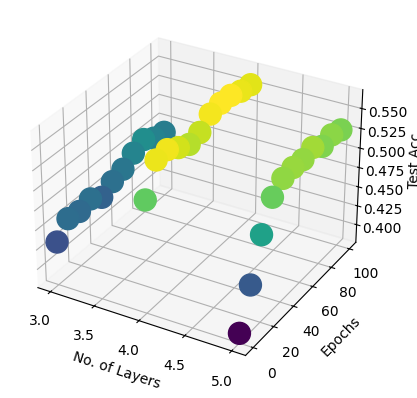

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(plot_mlp[:,0], plot_mlp[:,1], plot_mlp[:,2], marker = "o", s = 250, alpha = 1, c = plot_mlp[:,2])
ax.set_xlabel("No. of Layers")
ax.set_ylabel("Epochs")
ax.set_zlabel("Test Acc")

### Squared Error Loss

In [51]:
loss_function = "squared_error"
plot_mlp = []

In [52]:
for layer_sizes in layer_list:
    print(f"Training MLP with layer sizes {layer_sizes} and loss function {loss_function}")
    mlp = MLP(layer_sizes, loss_function=loss_function, seed = 69)
    num_classes = len(np.unique(y1_train))
    #print(num_classes)
    y1_train_one_hot = one_hot_encode(y1_train, num_classes)
    #print(y_train_one_hot)
    y1_test_one_hot = one_hot_encode(y1_test, num_classes)
    #print(y_test_one_hot)

    y1_pred = mlp.forward(X1_test,len(layer_sizes)-1)
    y1_pred_labels = np.argmax(y1_pred, axis=1)
    test_cm = confusion_matrix(y1_test.astype(int), y1_pred_labels, num_classes)
    test_acc = accuracy_from_cm(test_cm)
    test_f1_scores = f1_score_from_cm(test_cm)
    print(f"Initial Performance: Test Acc = {test_acc:.4f}")
    print("F1 Scores:")
    for i, f1_score in enumerate(test_f1_scores):
        print(f"Class {i}: {f1_score:.4f}")
    print("Confusion Matrix:")
    print(test_cm)
    print()

    for epoch in range(101):
        mlp.train(list(zip(X1_train, y1_train)), 1, 0.01,len(layer_sizes)-1)
        if epoch %10 == 0:  # Check if epoch is a multiple of 10
            y1_pred = mlp.forward(X1_test,len(layer_sizes)-1)
            y1_pred_labels = np.argmax(y1_pred, axis=1)
            test_cm = confusion_matrix(y1_test.astype(int), y1_pred_labels, num_classes)
            test_acc = accuracy_from_cm(test_cm)
            test_f1_scores = f1_score_from_cm(test_cm)
            print(f"Epoch {epoch}: Test Acc = {test_acc:.4f}")
            print("F1 Scores:")
            for i, f1_score in enumerate(test_f1_scores):
                print(f"Class {i}: {f1_score:.4f}")
            print("Confusion Matrix:")
            print(test_cm)
            print()
            plot_mlp.append([len(layer_sizes), epoch, test_acc])

Training MLP with layer sizes [10, 32, 2] and loss function squared_error
Initial Performance: Test Acc = 0.4475
F1 Scores:
Class 0: 0.4829
Class 1: 0.4069
Confusion Matrix:
[[516. 472.]
 [633. 379.]]

Epoch 0: Test Acc = 0.4415
F1 Scores:
Class 0: 0.4286
Class 1: 0.4538
Confusion Matrix:
[[419. 569.]
 [548. 464.]]

Epoch 10: Test Acc = 0.4495
F1 Scores:
Class 0: 0.4304
Class 1: 0.4673
Confusion Matrix:
[[416. 572.]
 [529. 483.]]

Epoch 20: Test Acc = 0.4455
F1 Scores:
Class 0: 0.4123
Class 1: 0.4752
Confusion Matrix:
[[389. 599.]
 [510. 502.]]

Epoch 30: Test Acc = 0.4595
F1 Scores:
Class 0: 0.4247
Class 1: 0.4903
Confusion Matrix:
[[399. 589.]
 [492. 520.]]

Epoch 40: Test Acc = 0.4725
F1 Scores:
Class 0: 0.4450
Class 1: 0.4974
Confusion Matrix:
[[423. 565.]
 [490. 522.]]

Epoch 50: Test Acc = 0.4650
F1 Scores:
Class 0: 0.4339
Class 1: 0.4929
Confusion Matrix:
[[410. 578.]
 [492. 520.]]

Epoch 60: Test Acc = 0.4685
F1 Scores:
Class 0: 0.4432
Class 1: 0.4916
Confusion Matrix:
[[423. 5

In [55]:
plot_mlp = np.array(plot_mlp)

Text(0.5, 0, 'Test Acc')

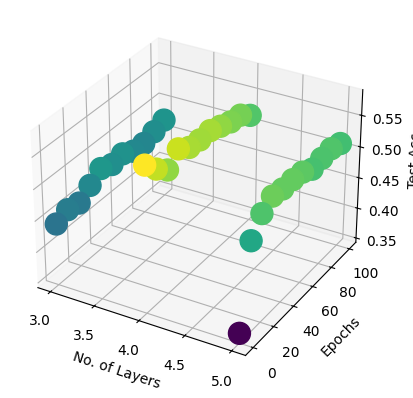

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(plot_mlp[:,0], plot_mlp[:,1], plot_mlp[:,2], marker = "o", s = 250, alpha = 1, c = plot_mlp[:,2])
ax.set_xlabel("No. of Layers")
ax.set_ylabel("Epochs")
ax.set_zlabel("Test Acc")

## Multiclass

In [39]:
file_name = 'multi_class_classification_data_group_19_train.txt'
inputf = pd.read_csv(file_name, delimiter = "\t")
X1 = inputf.iloc[:,0:25]
Y1 = inputf.iloc[:,25]
X1 = np.array(X1)
Y1 = np.array(Y1)

n = Y1.shape[0]
X1_train, X1_test = X1[:int(6*n/7)], X1[int(6*n/7):] #splitting data into train and test
y1_train, y1_test = Y1[:int(6*n/7)], Y1[int(6*n/7):]
    
#print(Y) #to test how data set is looking

print(X1_train.shape,X1_test.shape)
print(y1_train.shape,y1_test.shape)

(60000, 25) (10000, 25)
(60000,) (10000,)


In [40]:
layer_list = [[25, 32, 10], [25, 16, 16, 10], [25, 28, 21, 14, 10]]

### Cross Entropy Loss

In [41]:
loss_function = "CE"
plot_mlp = []

In [63]:
for layer_sizes in layer_list:
    print(f"Training MLP with layer sizes {layer_sizes} and loss function {loss_function}")
    mlp = MLP(layer_sizes, loss_function=loss_function, seed = 69)
    num_classes = len(np.unique(y1_train))
    #print(num_classes)
    y1_train_one_hot = one_hot_encode(y1_train, num_classes)
    #print(y_train_one_hot)
    y1_test_one_hot = one_hot_encode(y1_test, num_classes)
    #print(y_test_one_hot)

    y1_pred = mlp.forward(X1_test,len(layer_sizes)-1)
    y1_pred_labels = np.argmax(y1_pred, axis=1)
    test_cm = confusion_matrix(y1_test.astype(int), y1_pred_labels, num_classes)
    test_acc = accuracy_from_cm(test_cm)
    test_f1_scores = f1_score_from_cm(test_cm)
    print(f"Initial Performance: Test Acc = {test_acc:.4f}")
    print("F1 Scores:")
    for i, f1_score in enumerate(test_f1_scores):
        print(f"Class {i}: {f1_score:.4f}")
    print("Confusion Matrix:")
    print(test_cm)
    print()

    for epoch in range(101):
        mlp.train(list(zip(X1_train, y1_train)), 1, 0.01,len(layer_sizes)-1)
        if epoch %10 == 0:  # Check if epoch is a multiple of 10
            y1_pred = mlp.forward(X1_test,len(layer_sizes)-1)
            y1_pred_labels = np.argmax(y1_pred, axis=1)
            test_cm = confusion_matrix(y1_test.astype(int), y1_pred_labels, num_classes)
            test_acc = accuracy_from_cm(test_cm)
            test_f1_scores = f1_score_from_cm(test_cm)
            print(f"Epoch {epoch}: Test Acc = {test_acc:.4f}")
            print("F1 Scores:")
            for i, f1_score in enumerate(test_f1_scores):
                print(f"Class {i}: {f1_score:.4f}")
            print("Confusion Matrix:")
            print(test_cm)
            print()
            plot_mlp.append([len(layer_sizes), epoch, test_acc])

Training MLP with layer sizes [25, 32, 10] and loss function CE
Initial Performance: Test Acc = 0.1009
F1 Scores:
Class 0: 0.0000
Class 1: 0.1288
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0690
Class 5: 0.0418
Class 6: 0.0000
Class 7: 0.0697
Class 8: 0.1369
Class 9: 0.1683
Confusion Matrix:
[[  0. 126.   0.   0.  51. 101.   0.  27. 307. 386.]
 [  0. 139.   0.   0.  24.  38.   0.  17. 415. 383.]
 [  0.  99.   0.   0.  28. 126.   0.  20. 216. 501.]
 [  0. 110.   1.   0.  59.  18.   0.  18. 283. 516.]
 [  0. 112.   0.   0.  47.  73.   0.   8. 362. 370.]
 [  0. 103.   2.   0.  39.  34.   0.  23. 290. 548.]
 [  0. 105.   0.   0.  34.  45.   0.  20. 348. 458.]
 [  0. 120.   1.   1.  27.  57.   0.  43. 234. 519.]
 [  0. 115.   2.   0.  27.  48.   0.  36. 273. 465.]
 [  0. 114.   0.   0.  55.  47.   0.  19. 294. 473.]]

Epoch 0: Test Acc = 0.0904
F1 Scores:
Class 0: 0.1193
Class 1: 0.0866
Class 2: 0.0517
Class 3: 0.0744
Class 4: 0.0868
Class 5: 0.0090
Class 6: 0.0869
Class 7: 0.0113
Class 8: 0

In [64]:
plot_mlp = np.array(plot_mlp)

Text(0.5, 0, 'Test Acc')

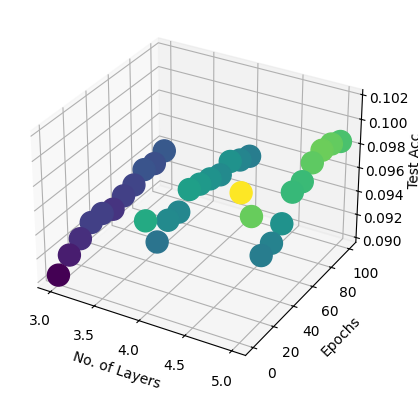

In [65]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(plot_mlp[:,0], plot_mlp[:,1], plot_mlp[:,2], marker = "o", s = 250, alpha = 1, c = plot_mlp[:,2])
ax.set_xlabel("No. of Layers")
ax.set_ylabel("Epochs")
ax.set_zlabel("Test Acc")

### Squared Error Loss

In [32]:
loss_function = "squared_error"
plot_mlp = []

In [42]:
for layer_sizes in layer_list:
    print(f"Training MLP with layer sizes {layer_sizes} and loss function {loss_function}")
    mlp = MLP(layer_sizes, loss_function=loss_function, seed = 69)
    num_classes = len(np.unique(y1_train))
    #print(num_classes)
    y1_train_one_hot = one_hot_encode(y1_train, num_classes)
    #print(y_train_one_hot)
    y1_test_one_hot = one_hot_encode(y1_test, num_classes)
    #print(y_test_one_hot)

    y1_pred = mlp.forward(X1_test,len(layer_sizes)-1)
    y1_pred_labels = np.argmax(y1_pred, axis=1)
    test_cm = confusion_matrix(y1_test.astype(int), y1_pred_labels, num_classes)
    test_acc = accuracy_from_cm(test_cm)
    test_f1_scores = f1_score_from_cm(test_cm)
    print(f"Initial Performance: Test Acc = {test_acc:.4f}")
    print("F1 Scores:")
    for i, f1_score in enumerate(test_f1_scores):
        print(f"Class {i}: {f1_score:.4f}")
    print("Confusion Matrix:")
    print(test_cm)
    print()

    for epoch in range(101):
        mlp.train(list(zip(X1_train, y1_train)), 1, 0.01,len(layer_sizes)-1)
        if epoch %10 == 0:  # Check if epoch is a multiple of 10
            y1_pred = mlp.forward(X1_test,len(layer_sizes)-1)
            y1_pred_labels = np.argmax(y1_pred, axis=1)
            test_cm = confusion_matrix(y1_test.astype(int), y1_pred_labels, num_classes)
            test_acc = accuracy_from_cm(test_cm)
            test_f1_scores = f1_score_from_cm(test_cm)
            print(f"Epoch {epoch}: Test Acc = {test_acc:.4f}")
            print("F1 Scores:")
            for i, f1_score in enumerate(test_f1_scores):
                print(f"Class {i}: {f1_score:.4f}")
            print("Confusion Matrix:")
            print(test_cm)
            print()
            plot_mlp.append([len(layer_sizes), epoch, test_acc])

Training MLP with layer sizes [25, 32, 10] and loss function CE
Initial Performance: Test Acc = 0.1009
F1 Scores:
Class 0: 0.0000
Class 1: 0.1288
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0690
Class 5: 0.0418
Class 6: 0.0000
Class 7: 0.0697
Class 8: 0.1369
Class 9: 0.1683
Confusion Matrix:
[[  0. 126.   0.   0.  51. 101.   0.  27. 307. 386.]
 [  0. 139.   0.   0.  24.  38.   0.  17. 415. 383.]
 [  0.  99.   0.   0.  28. 126.   0.  20. 216. 501.]
 [  0. 110.   1.   0.  59.  18.   0.  18. 283. 516.]
 [  0. 112.   0.   0.  47.  73.   0.   8. 362. 370.]
 [  0. 103.   2.   0.  39.  34.   0.  23. 290. 548.]
 [  0. 105.   0.   0.  34.  45.   0.  20. 348. 458.]
 [  0. 120.   1.   1.  27.  57.   0.  43. 234. 519.]
 [  0. 115.   2.   0.  27.  48.   0.  36. 273. 465.]
 [  0. 114.   0.   0.  55.  47.   0.  19. 294. 473.]]

Epoch 0: Test Acc = 0.0904
F1 Scores:
Class 0: 0.1193
Class 1: 0.0866
Class 2: 0.0517
Class 3: 0.0744
Class 4: 0.0868
Class 5: 0.0090
Class 6: 0.0869
Class 7: 0.0113
Class 8: 0

In [43]:
plot_mlp = np.array(plot_mlp)

Text(0.5, 0, 'Test Acc')

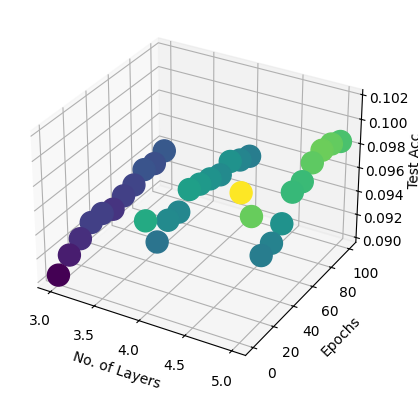

In [44]:

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(plot_mlp[:,0], plot_mlp[:,1], plot_mlp[:,2], marker = "o", s = 250, alpha = 1, c = plot_mlp[:,2])
ax.set_xlabel("No. of Layers")
ax.set_ylabel("Epochs")
ax.set_zlabel("Test Acc")

On running the same code on a different, better accuracy (40+%) 
for multiclass classification. 

This could be attributed to the randomness we have in weight generation

# Multilayer Perceptron - Regression

Experiments Done:
1) Ran MLP for different combinations of activation layers. Found that for just sigmoid activation, the gradient matrices of first layer were very low, so switched to relu activation for the hidden layers.

2) Ran L1 regularisation and found that risk increased with epochs. Implemented L2 regularisation along with a combination of L1 and L2 regularisation as well.

3) Plotted Bias-variance curves divided our dataset into 7 random datasets. Observed that hyperparameter tuning is really dependent on dataset as the risk increased after a certain number of epochs

In [270]:
def activation_function(d):
    x = d.shape[0]
    y = d.shape[1]
    c = []
    for i in range(x):
        l=[]
        for j in range(y):
            l.append(1/(1+np.exp(-d[i][j]))) #sigmoid function
        c.append(l)
    return np.array(c)

def activation_func_derivative(d): #derivative of activation function
    x = d.shape[0]
    y = d.shape[1]
    c = []
    for i in range(x):
        l = []
        for j in range(y):
            l.append(d[i][j]/(1+np.exp(-d[i][j]))**2) #sigmoid function
        c.append(l)
    return np.array(c)

def activation_relu(d):
    x = d.shape[0]
    y = d.shape[1]
    c = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if d[i,j]<=0:
                c[i,j] = 0
            else:
                c[i,j] = d[i,j]
    return c
                
def activation_relu_der(d):
    x = d.shape[0]
    y = d.shape[1]
    c = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if d[i,j]<=0:
                c[i,j] = 0
            else:
                c[i,j] = 1
    return c
def activation_tanh(d):
    x = d.shape[0]
    y = d.shape[1]
    c = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            c[i,j] = math.tanh(d[i,j])
    return c

def activation_tanh_der(d):
    x = d.shape[0]
    y = d.shape[1]
    c = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            c[i,j] = 1/(math.cosh(d[i,j])**2)
    return c

def activation_x(d,n):
    return d**n
def activation_x_der(d,n):
    x = d.shape[0]
    y = d.shape[1]
    c = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            c[i,j] = n*(d[i,j]**(n-1))
    return c
    

def array_dot(a,b):
    a = np.array(a)
    b = np.array(b)
    a = a.reshape(a.shape[0],1)
    b = b.reshape(b.shape[0],1)
    c = np.dot(a,b.T)
    return c

def reg_L1(lambda_1,W_super):
    n = len(W_super)
    val = 0
    for i in range(n):
        if len(W_super[i].shape) == 1:
            y = 1
            val += np.sum(np.abs(W_super[i]))
        else:
            y = W_super[i].shape[1]
            
            for j in range(y):
                val += np.sum(np.abs(W_super[i][:,j]))
    return lambda_1*val

def reg_L2(lambda_2,W_super):
    n = len(W_super)
    val = 0
    for i in range(n):
        if len(W_super[i].shape) == 1:
            y = 1
            val += np.linalg.norm(W_super[i])**2
        else:
            y = W_super[i].shape[1]
            for j in range(y):
                val += np.linalg.norm(W_super[i][:,j])**2
    return lambda_2*val
        
        

def reg_L1_der(lambda_1,W):  #lasso regularisation, derivative equals -1 or 1 element wise
    x = W.shape[0]
    y = W.shape[1]
    c = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            c[i,j] = lambda_1*W[i,j]/abs(W[i,j])
    return c

def reg_L2_der(lambda_2,W):  #risge regularisation, derivative equals 2*value of element
    x = W.shape[0]
    y = W.shape[1]
    c = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            c[i,j] = lambda_2*W[i,j]
    return c

In [ ]:
class MLP: #multi-layer fully connected feed forward neural network is just a multi layer perceptron
    
    def __init__(self,X,Y,k, loss_func,l,node_arr,learning_rate,batch_size=1000,lambda_1 = 0,lambda_2 = 0,last_act = "sigmoid"): #l = no. of hidden layers including input layer and excluding output layer. So there are a total of l+1 layers
        #parameters to tune
        self.W_super = []
        self.b_super = []
        #variables defining MLP architecture
        self.A = [] #array of outputs after activation function for each layer
        self.Z = [] #array of outputs before activation function for each layer
        self.dim_in = X.shape[1] #input dimension
        self.dim_out = k  
        self.m = X.shape[0] #number of data points
        self.X = X
        self.last_act = last_act
        if k == 1:
            self.Y = Y.reshape((self.m,1))
        else:
            self.Y = Y
        #hyperparameters
        self.loss_func = loss_func
        self.l = l
        self.node_arr = node_arr
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        #regularization constants for L1 and L2 regularization
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        for i in range(self.l+1): #initialising W and b matrix for each layer
            if i==0:
                self.W_super.append(np.random.random([self.dim_in,self.node_arr[i]]))
                self.b_super.append(np.random.random([1,self.node_arr[i]]))
                self.A.append(np.zeros([self.m,self.node_arr[i]]))
                self.Z.append(np.zeros([self.m,self.node_arr[i]]))
            elif i==l:
                self.W_super.append(np.random.random([self.node_arr[i-1],self.dim_out]))
                self.b_super.append(np.random.random([1,self.dim_out]))
                self.A.append(np.zeros([self.m,self.dim_out]))
                self.Z.append(np.zeros([self.m,self.dim_out]))
            else:
                self.W_super.append(np.random.random([self.node_arr[i-1],self.node_arr[i]]))
                self.b_super.append(np.random.random([1,self.node_arr[i]]))
                self.A.append(np.zeros([self.m,self.node_arr[i]]))
                self.Z.append(np.zeros([self.m,self.node_arr[i]]))
                
    def details(self):
        print("Shape of feature matrix:",self.X.shape)
        print("Shape of Y matrix:",self.Y.shape)
        print("Number of data points:",self.m)
        print("Input dimension:",self.dim_in)
        print("Output dimension:",self.dim_out)
        print()
        for i in range(self.l+1):
            print(f"Shape of {i}th layer weight matrix:",self.W_super[i].shape)
            #print(f"{i}th weight matrix",self.W_super[i])
            print(f"Shape of {i}th layer bias matrix:",self.b_super[i].shape)
           # print(f"{i}th bias matrix",self.b_super[i])
            print()

        
    def forward_propagation(self):
        
        for i in range(self.l):
            if i==0:
                self.Z[i] = np.dot(self.X,self.W_super[i])+self.b_super[i] #broadcasting bias matrix
                self.A[i] = activation_x(self.Z[i],1)
                #print(self.Z[i])
                #print("First layer output",self.A[i])
            else:
                #print(f"{i-1}th layer output",self.A[i-1])
                self.Z[i] = np.dot(self.A[i-1],self.W_super[i]) + self.b_super[i]
                self.A[i] = activation_x(self.Z[i],1) #the activation function here can be changed for layers
                #print(f"{i}th layer output",self.A[i])
            
        self.Z[self.l] = np.dot(self.A[self.l-1],self.W_super[self.l]) + self.b_super[self.l] #relu activation in first l layers, sigmoid activation in (l+1)th layer
        if self.last_act == "sigmoid":
            self.A[self.l] = activation_function(self.Z[self.l])
        elif self.last_act == "relu":
            self.A[self.l] = activation_relu(self.Z[self.l])
        elif self.last_act == "tanh":
            self.A[self.l] = activation_tanh(self.Z[self.l])
        elif self.last_act == "x":
            self.A[self.l] = activation_x(self.Z[self.l],1)
            
        #print(f"{self.l}th layer output",self.A[self.l])
        return self.A,self.W_super,self.lambda_1,self.lambda_2
    def backwards_propagation(self):
        delta = [0]*(self.l+1)
        dA = [0]*(self.l+1)
        dW = [0]*(self.l+1)
        db = [0]*(self.l+1)
        for i in range(self.l):
            dA[i] = activation_x_der(self.A[i],1)  #the activaion function in layers can be played around with
        if self.last_act == "sigmoid":
            dA[self.l] = activation_func_derivative(self.A[self.l])
        elif self.last_act == "relu":
            dA[self.l] = activation_relu_der(self.A[self.l])
        elif self.last_act == "tanh":
            dA[self.l] = activation_tanh_der(self.A[self.l])
        elif self.last_act == "x":
            dA[self.l] = activation_x_der(self.A[self.l],1)
            #print("dA shape",dA[i].shape)
            
        if self.loss_func == "sq_err": #taking squared error loss divided by 2
            """print("Shape of dA[l]",dA[self.l].shape)
            print("Shape of self.A[l]",self.A[self.l].shape)
            print("Shape of self.Y]",self.Y.shape)"""
            delta[self.l] = (self.A[self.l] - self.Y) * dA[self.l]
            #print(f"A shape on layer {self.l}:",self.A[self.l].shape)
        elif self.loss_func == "cross_entropy": #taking cross entropy loss
             delta[self.l] = (self.A[self.l] - self.Y)  * dA[self.l]  #in all scenarios, whether k = 1 or k > 1
        #print("Shape of delta[l]:",delta[self.l].shape)   
        
        for b in range(int(self.m/self.batch_size)): #mini-batch gradient descent as opposed to stochastic gradient descent
            
            for j in range(self.batch_size):
                dW[self.l] += array_dot(self.A[self.l-1][b*self.batch_size+j],delta[self.l][b*self.batch_size+j])  #summing and averaging over data points
            dW[self.l] = dW[self.l]/self.batch_size
            #print("dW shape on layer",self.l,":",dW[self.l].shape)
            
            for i in range(self.l-1,0,-1):

                #print("Inside this loop")
                #print("Multiplying these:",delta[i+1],self.W_super[i+1],dA[i])

                delta[i] = np.dot(delta[i+1],self.W_super[i+1].T) * dA[i]
                for k in range(self.batch_size):
                    dW[i] += array_dot(self.A[i-1][b*self.batch_size+k],delta[i][b*self.batch_size+k])
                dW[i] = dW[i]/self.batch_size
                #print(f"Shape of dW on layer {i}:",dW[i].shape)

            delta[0] = (np.dot(delta[1],self.W_super[1].T) * dA[0])
            for k in range(self.batch_size):
                #print("Multiplying these:",self.X[k],delta[0][k])
                dW[0] += array_dot(self.X[b*self.batch_size+k],delta[0][b*self.batch_size+k])
            dW[0] = dW[0]/self.batch_size

            for i in range(self.l+1):      
                db[i] = np.sum(delta[i],axis=0)/self.batch_size


            for i in range(self.l+1): 
                #print(f"dW and db for {i}th layer:",dW[i],db[i])
                self.W_super[i] -= self.learning_rate*dW[i] - reg_L1(self.lambda_1,self.W_super[i]) - reg_L2(self.lambda_2,self.W_super[i])
                self.b_super[i] -= self.learning_rate*db[i] - reg_L1(self.lambda_1,self.b_super[i]) - reg_L2(self.lambda_2,self.b_super[i])
                
            dW = [0]*(self.l+1)  #reinitialising the weight and bias gradients for the next mini-batch
            db = [0]*(self.l+1)
    

In [206]:
file_name = 'regression_data_uni_group_19_train.txt'
X_sub=[]
Y_sub=[]
X=[]
Y=[]
k=2 
with open(file_name,"r") as csvfile:
    reader_variable = csv.reader(csvfile,delimiter="\t")
    for row in reader_variable:
        X_sub.append(row[0:5])
        Y_sub.append(row[5])
for i in range(1,len(Y_sub)):
    row = []
    if k==2:
        Y.append(float(Y_sub[i]))
    for j in range(5):
        
        row.append(float(X_sub[i][j]))
    X.append(row)

if k>2:
    for i in range(1,len(Y_sub)):
        c=[0]*k
        c[Y_sub[i]] = 1
        Y.append(c)
    
    
X = np.array(X)
Y = np.array(Y)
    
#print(Y) #to test how data set is looking
print(X)
print(Y.shape)


[[-0.06730249 -0.0672517  -0.20053842  0.99773604  0.97968584]
 [-1.14710972 -0.91157949  0.29526848  0.41112387 -0.95541432]
 [-0.01396429 -0.01396384 -0.04188062  0.9999025   0.99912262]
 ...
 [ 1.5464311   0.99970318 -0.9973297   0.02436281 -0.0730306 ]
 [ 0.73523295  0.67075994  0.80512952  0.74167452 -0.59309903]
 [ 0.59164902  0.5577305   0.97923351  0.8300221  -0.2027356 ]]
(7000,)


In [242]:
p1 = MLP(X,Y,1,"sq_err",2,[3,3],0.001,batch_size = 7000,lambda_1 = 0.0001)
p1.details()


Shape of feature matrix: (7000, 5)
Shape of Y matrix: (7000, 1)
Number of data points: 7000
Input dimension: 5
Output dimension: 1

Shape of 0th layer weight matrix: (5, 3)
0th weight matrix [[0.24119581 0.76796446 0.33755708]
 [0.6539751  0.95148255 0.81121598]
 [0.92944574 0.10197648 0.13592357]
 [0.89689672 0.92190675 0.10324507]
 [0.1289191  0.2970857  0.86799813]]

Shape of 0th layer bias matrix: (1, 3)
0th bias matrix [[0.57793849 0.16297312 0.568189  ]]

Shape of 1th layer weight matrix: (3, 3)
1th weight matrix [[0.30032841 0.90283388 0.2462527 ]
 [0.6632042  0.85629082 0.77588749]
 [0.4946156  0.1665723  0.12574037]]

Shape of 1th layer bias matrix: (1, 3)
1th bias matrix [[0.48003641 0.34928657 0.00657531]]

Shape of 2th layer weight matrix: (3, 1)
2th weight matrix [[0.87760946]
 [0.9127905 ]
 [0.59225088]]

Shape of 2th layer bias matrix: (1, 1)
2th bias matrix [[0.03922498]]



In [245]:
def compute_risk(pred_Y,Y,lambda_1,lambda_2,W_super):  #risk computing with regularization
    n = Y.shape[0]
    risk = 0
    for i in range(n):
        risk+=np.linalg.norm(pred_Y[i]-Y[i])**2
    risk += reg_L2(lambda_2,W_super) + reg_L1(lambda_1,W_super)
    risk=risk/(2*n)
    return risk


def training_model(p,epochs,step,X=X,Y=Y):
    L = p.l
    risk_arr= []
    epoch_arr = []
    for i in range(epochs):
        A,W_super,lambda_1,lambda_2 = p.forward_propagation()
        #print(A[L].shape)
        risk = compute_risk(A[L],Y,lambda_1,lambda_2,W_super)
        p.backwards_propagation()
        
        if i%step == 0:
            if lambda_1 == lambda_2 == 0:  #Three regularisation techniques
                print(f"Risk on Epoch {i} :",risk)
            elif lambda_1 != 0 and lambda_2 == 0:
                print(f"Risk with L1 regularisation on Epoch {i} :",risk)
            elif lambda_2 != 0 and lambda_1 == 0:
                print(f"Risk with L2 regularisation on Epoch {i} :",risk)
            elif lambda_2 != 0 and lambda_1 != 0:
                print(f"Risk with L2 and L1 regularisation on Epoch {i} :",risk)
            risk_arr.append(risk)
            epoch_arr.append(i)
            
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(epoch_arr,risk_arr)
    ax.title.set_text("Training risk vs Epochs")
    
    
    return A[L]

def training_model_2(p,epochs,step,X=X,Y=Y):
    L = p.l
    l = []
    risk_arr= []
    epoch_arr = []
    for i in range(epochs):
        A,W_super,lambda_1,lambda_2 = p.forward_propagation()
        #print(A[L].shape)
        risk = compute_risk(A[L],Y,lambda_1,lambda_2,W_super)
        p.backwards_propagation()
        
        if i%step == 0:
            if lambda_1 == lambda_2 == 0:  #Three regularisation techniques
                print(f"Risk on Epoch {i} :",risk)
            elif lambda_1 != 0 and lambda_2 == 0:
                print(f"Risk with L1 regularisation on Epoch {i} :",risk)
            elif lambda_2 != 0 and lambda_1 == 0:
                print(f"Risk with L2 regularisation on Epoch {i} :",risk)
            elif lambda_2 != 0 and lambda_1 != 0:
                print(f"Risk with L2 and L1 regularisation on Epoch {i} :",risk)
            risk_arr.append(risk)
            epoch_arr.append(i)
            l.append(A[L])
            
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(epoch_arr,risk_arr)
    ax.title.set_text("Training risk vs Epochs")
    
    
    return l
            
#testing if copute_risk works
#a = np.array([[1,1,1],[2,2,2]])
#b = np.array([[0,0,0],[2,2,2]])
#print(compute_risk(a,b))

Training on dataset no. 1:

Risk on Epoch 0 : 0.14458201382321767
Risk on Epoch 40 : 0.06525471371857905
Risk on Epoch 80 : 0.05920590540957545
Risk on Epoch 120 : 0.054838513469481244
Risk on Epoch 160 : 0.05127995921097548
Risk on Epoch 200 : 0.04801166588154084
Risk on Epoch 240 : 0.044751319161081535
Risk on Epoch 280 : 0.04143715473294822
Risk on Epoch 320 : 0.037986112683153155
Risk on Epoch 360 : 0.034652197764627336
Risk on Epoch 400 : 0.031375851526222444
Risk on Epoch 440 : 0.028144396474622885
Training on dataset no. 2:

Risk on Epoch 0 : 0.15208368282209034
Risk on Epoch 40 : 0.08556149650737614
Risk on Epoch 80 : 0.09123200773795503
Risk on Epoch 120 : 0.09701150371629695
Risk on Epoch 160 : 0.10181502623981564
Risk on Epoch 200 : 0.10579440403654196
Risk on Epoch 240 : 0.10930870695266767
Risk on Epoch 280 : 0.11253535464752447
Risk on Epoch 320 : 0.1157127059265062
Risk on Epoch 360 : 0.11902088278098874
Risk on Epoch 400 : 0.12259472942629651
Risk on Epoch 440 : 0.12649

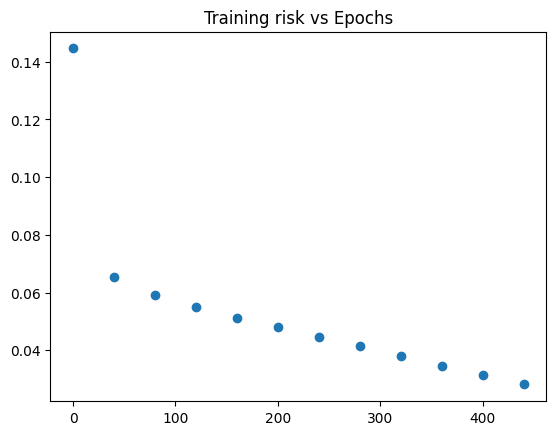

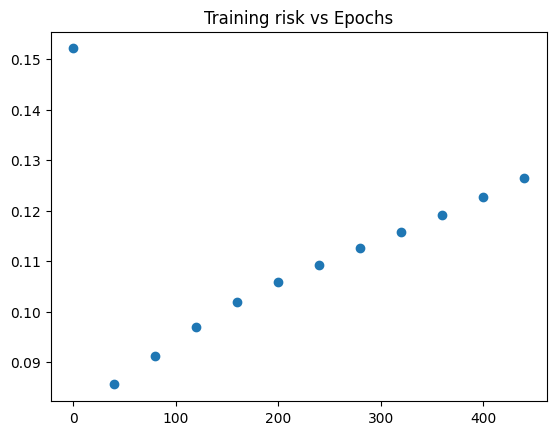

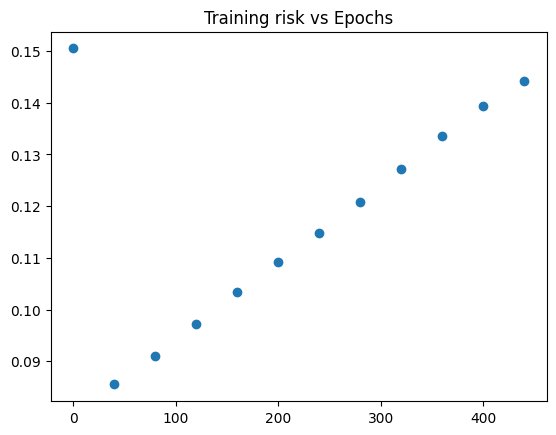

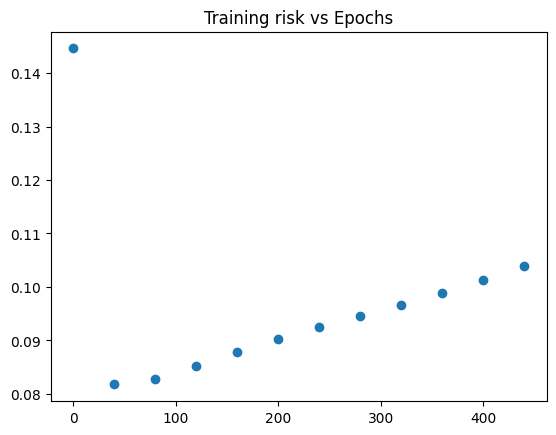

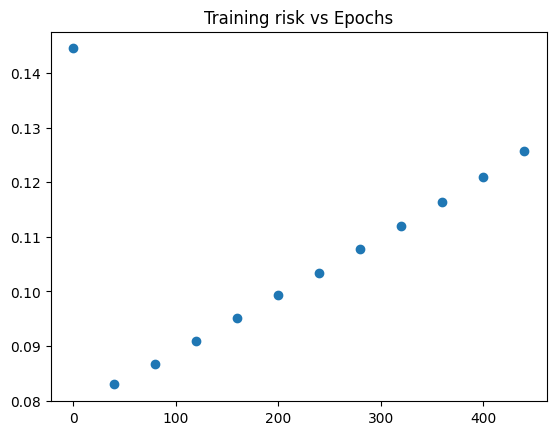

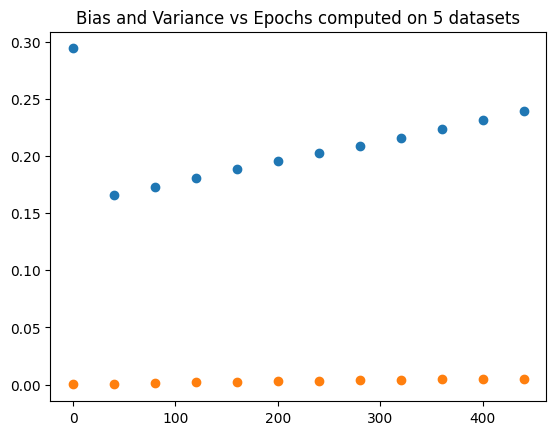

In [259]:
# Since we need different datasets for calculating bias-variance curves, let us divide our training datasets and calculate sample bias and sample means from those

def bias_variance(X,Y,k,loss_func,l1,node_arr,learning_rate,div,epochs,step):
    c = []
    l = []
    epoch_arr = []
    bias_arr = []
    var_arr = []
    d = int(X.shape[0]/div)
    for i in range(d):
        p = MLP(X,Y,k,loss_func,l1,node_arr,learning_rate)
        print(f"Training on dataset no. {i+1}:")
        print()
        #p.details()
        X_div = X[i*div:(i+1)*div+1]
        Y_div = Y[i*div:(i+1)*div+1]
        l = training_model_2(p,epochs,step,X_div,Y_div)
        c.append(l)
        del p
    h_avg = []
    for i in range(0,epochs,step):
        m = np.zeros(Y.shape)
        m = m.reshape((Y.shape[0],1))
        #print(m.shape)
        for j in range(d):
            #print(c[j][int(i/step)])
            #print(c[j][int(i/step)].shape)
            m += c[j][int(i/step)]
        m/=d
        h_avg.append(m)
    for i in range(0,epochs,step):
        sum = 0
        bias_arr.append(np.mean((h_avg[int(i/step)] - Y)**2))
        for j in range(d):
            sum += np.mean((c[j][int(i/step)] - h_avg[int(i/step)])**2)
        var_arr.append(sum/d)
        epoch_arr.append(i)
        
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(epoch_arr,bias_arr)
    ax.scatter(epoch_arr,var_arr)
    ax.title.set_text(f"Bias and Variance vs Epochs computed on {d} datasets")
        


bias_variance(X,Y,1,"sq_err",5,[5,4,3,3,2],0.01,1400,480,40)



        

            
    
            
    
    

Risk with L1 regularisation on Epoch 0 : 0.14858121722316917
Risk with L1 regularisation on Epoch 25 : 0.14879340028744484
Risk with L1 regularisation on Epoch 50 : 0.14897871183075137
Risk with L1 regularisation on Epoch 75 : 0.14914298134674744
Risk with L1 regularisation on Epoch 100 : 0.14928143123431664
Risk with L1 regularisation on Epoch 125 : 0.14938586338307014
Risk with L1 regularisation on Epoch 150 : 0.14944916500400302
Risk with L1 regularisation on Epoch 175 : 0.14947153829241866
Risk with L1 regularisation on Epoch 200 : 0.14945584675846563
Risk with L1 regularisation on Epoch 225 : 0.14941301544384075
Risk with L1 regularisation on Epoch 250 : 0.14935127312410437
Risk with L1 regularisation on Epoch 275 : 0.14929686036384124
Risk with L1 regularisation on Epoch 300 : 0.14932205254530367
Risk with L1 regularisation on Epoch 325 : 0.1496041225811424
Risk with L1 regularisation on Epoch 350 : 0.14989821793216396
Risk with L1 regularisation on Epoch 375 : 0.1502034608945351

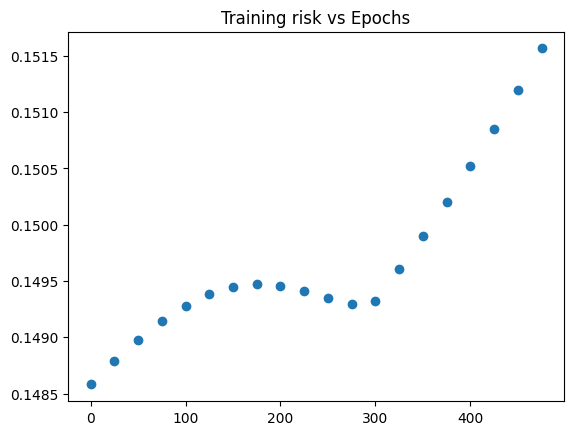

In [243]:
pred_y7 = training_model(p1,500,25)  #To see if regularisation increases the risk as one would expect. We can remove the lambda_1 val to see the normal risk vs epochs curves

In [142]:
p2 = MLP(X,Y,1,"sq_err",3,[12,32,4],0.002)
p2.details()
training_model(p2,200,10)

Shape of feature matrix: (7000, 5)
Shape of Y matrix: (7000, 1)
Number of data points: 7000
Input dimension: 5
Output dimension: 1

Shape of 0th layer weight matrix: (5, 12)
0th weight matrix [[0.43023787 0.66303244 0.9610813  0.07611512 0.43990173 0.45689989
  0.12559702 0.06611548 0.88556996 0.82757308 0.44353956 0.77171297]
 [0.60441948 0.53489976 0.92812484 0.19179752 0.14652482 0.63978639
  0.03883866 0.62574967 0.37207501 0.7825998  0.71555805 0.11629092]
 [0.40237944 0.87834287 0.84867127 0.51644864 0.39230004 0.90766291
  0.84846791 0.08889377 0.75090709 0.56398396 0.6350374  0.29689742]
 [0.59726759 0.67930798 0.95102889 0.74636769 0.77308541 0.86152062
  0.9418867  0.9270771  0.11462235 0.4221541  0.30102109 0.58343067]
 [0.42403039 0.10259383 0.43845418 0.71223511 0.57811339 0.17100579
  0.2151672  0.36422567 0.5202583  0.98506686 0.65920876 0.09002284]]

Shape of 0th layer bias matrix: (1, 12)
0th bias matrix [[0.94336568 0.39498715 0.51288112 0.75930711 0.84821236 0.517247

array([[2.26791560e-068],
       [2.13789348e-006],
       [1.84626659e-076],
       ...,
       [1.39789063e-060],
       [5.76509988e-095],
       [2.61525797e-105]])

In [349]:
"""def kernel(X): #Since it was observed in A1, q3 on regression that the data and probabilities seemed to follow a periodic pattern, let us try a fourier decomposition type kernel which worked well in A1
    X_k = []
    for i in range(X.shape[0]):
        X_k.append([X[i][0],X[i][1],X[i][2],X[i][3],X[i][4],math.sin(X[i][0]),math.sin(X[i][1]),math.sin(X[i][2]),math.sin(X[i][3]),math.sin(X[i][4]),math.sin(3*X[i][0]),math.sin(3*X[i][1]),math.sin(3*X[i][2]),math.sin(3*X[i][3]),math.sin(3*X[i][4])])
    return np.array(X_k)    

X1 = kernel(X)"""

p3 = MLP(X,Y,2,"cross_entropy",4,[2,3,4,5],0.0001)
p3.details()
pred_y1 = training_model(p3,200,10)



Shape of feature matrix: (7000, 15)
Shape of Y matrix: (7000,)
Number of data points: 7000
Input dimension: 15
Output dimension: 1
Shape of 0th layer weight matrix: (15, 2)
0th weight matrix [[0.45906565 0.83197079]
 [0.19722569 0.3492708 ]
 [0.53134319 0.01538754]
 [0.41025631 0.73983384]
 [0.78895272 0.46886802]
 [0.17524685 0.71880122]
 [0.68958763 0.09656063]
 [0.51881073 0.42030589]
 [0.49952644 0.67290428]
 [0.84715787 0.26242292]
 [0.46874372 0.80296278]
 [0.10768094 0.84595169]
 [0.67184769 0.73868694]
 [0.05331491 0.924788  ]
 [0.80865225 0.12581257]]
Shape of 0th layer bias matrix: (1, 2)
0th bias matrix [[0.26030949 0.09799153]]
Shape of 1th layer weight matrix: (2, 3)
1th weight matrix [[0.58399316 0.26460195 0.66616151]
 [0.99987752 0.17828748 0.24670386]]
Shape of 1th layer bias matrix: (1, 3)
1th bias matrix [[0.98988598 0.16326016 0.06257727]]
Shape of 2th layer weight matrix: (3, 4)
2th weight matrix [[0.19949042 0.96863862 0.05898605 0.55742644]
 [0.88189196 0.7806911

In [144]:
def convert(pred_y1):
    pred_y=[]
    for i in range(pred_y1.shape[0]):
        pred_y.append(pred_y1[i][0])
    pred_y=np.array(pred_y)
    return pred_y
pred_y=convert(pred_y7)
pred_y.shape
pred_y7.shape
    

(7000, 1)

MSE: 0.2845042518206425
MAE: 0.3896822480430237
PCC: -0.3865166660892373


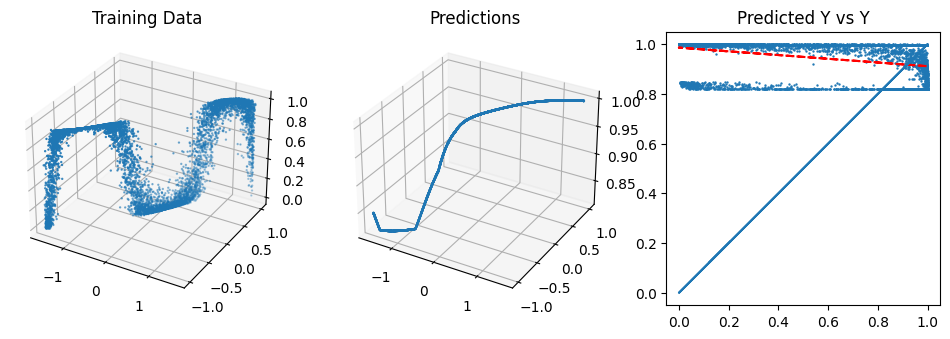

In [159]:
def mse(y1,y2):
    sum = 0
    n = len(y1)
    for i in range(n):
        sum += (y1[i]-y2[i])**2
    return sum/n

def mae(y1,y2):
    sum = 0
    n = len(y1)
    for i in range(n):
        sum += abs(y1[i]-y2[i])
    return sum/n

def pcc(y1,y2):
    sd1 = np.std(y1)
    sd2 = np.std(y2)
    cov = np.cov(y1,y2)[0][1]
    return cov/(sd1*sd2)

def print_metrics(y,pred_y):
    print(f"MSE: {mse(y,pred_y)}")
    print(f"MAE: {mae(y,pred_y)}")
    print(f"PCC: {pcc(y,pred_y)}")
    
def regression_plot(pred_y,X=X,Y=Y):
    #fig,ax = plt.subplots(1,2, subplot_kw={"projection":"3d"})
    fig = plt.figure(figsize=(12,4))
    
    ax1 = fig.add_subplot(1, 3, 1, projection="3d")
    ax1.scatter(X[:,0],X[:,1],Y,s=0.5)
    ax1.title.set_text("Training Data")
    
    ax2 = fig.add_subplot(1, 3, 2, projection="3d")
    ax2.scatter(X[:,0],X[:,1],pred_y,s=0.5)
    ax2.title.set_text("Predictions")
    
    ax3 = fig.add_subplot(1,3,3)
    ax3.scatter(Y,pred_y, s=0.5)
    ax3.title.set_text("Predicted Y vs Y")
    ax3.set_box_aspect(1)
    
    z = np.polyfit(Y,pred_y,1)
    p = np.poly1d(z)
    ax3.plot(Y,p(Y),"r--", label = "Prediction Trend Line")
    ax3.plot(Y,Y, label = "Ideal Trend Line")
    #fig.suptitle("example")
    #ax[0].scatter(x1, x2, y1, s = 0.5)
    #ax[1].scatter(x1, x2, pred, s = 0.5)
    
    plt.show()
    
print_metrics(Y,pred_y)
regression_plot(pred_y)

In [147]:
def risk_sq_err(pred_y,y):  #Verifying that our risk function works as expected
    risk = 0
    for i in range(len(y)):
        risk += (pred_y[i]-y[i])**2
    risk/=2*len(y)
    return risk
print(Y)
print(pred_y7)
print(risk_sq_err(pred_y7,Y))

[0.12372817 0.99785539 0.12267616 ... 0.41700976 0.86424993 0.20552512]
[[0.99657104]
 [0.81853393]
 [0.99762549]
 ...
 [0.99862336]
 [0.99833593]
 [0.99894969]]
[0.14225213]


Shape of feature matrix: (7000, 5)
Shape of Y matrix: (7000, 1)
Number of data points: 7000
Input dimension: 5
Output dimension: 1

Shape of 0th layer weight matrix: (5, 5)
0th weight matrix [[0.34335892 0.87850484 0.28266491 0.5374461  0.84306573]
 [0.3044844  0.67036993 0.43110024 0.30675674 0.01483927]
 [0.27075712 0.23991264 0.87407222 0.2372506  0.90608102]
 [0.70873711 0.07033499 0.81905481 0.39274171 0.92681881]
 [0.71899689 0.90962687 0.33934187 0.37075833 0.41193378]]

Shape of 0th layer bias matrix: (1, 5)
0th bias matrix [[0.8974368  0.26647516 0.36899    0.9324478  0.31534899]]

Shape of 1th layer weight matrix: (5, 4)
1th weight matrix [[0.46224896 0.79799756 0.14808397 0.68395463]
 [0.90797714 0.12801806 0.32891586 0.68670337]
 [0.50999927 0.01732453 0.45888908 0.14780333]
 [0.56977038 0.494367   0.10709938 0.89188566]
 [0.46082782 0.12428932 0.48649096 0.64939936]]

Shape of 1th layer bias matrix: (1, 4)
1th bias matrix [[8.27646892e-01 9.63715510e-01 6.14176913e-01 9.57

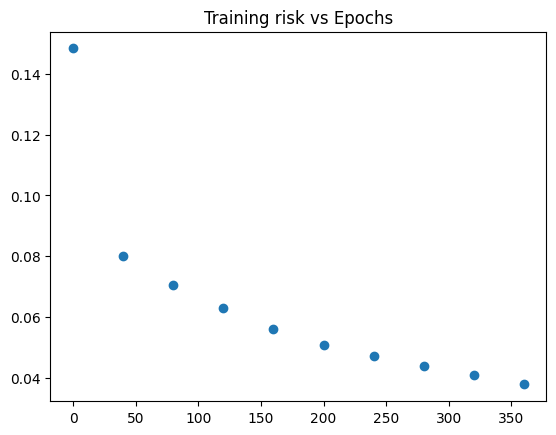

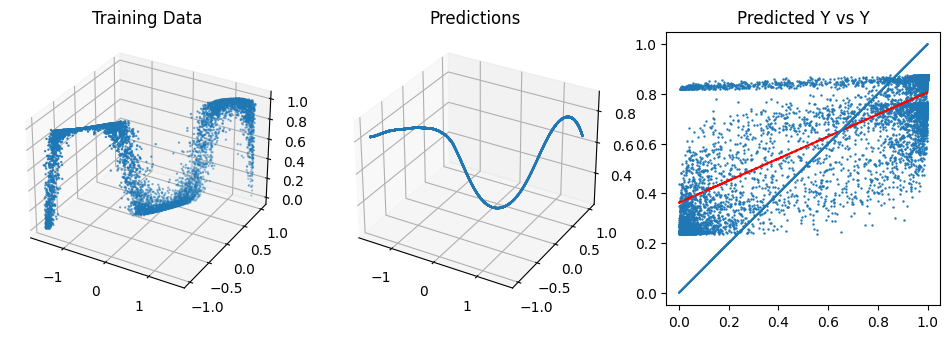

In [213]:
p4 = MLP(X,Y,1,"sq_err",5,[5,4,3,3,2],0.01)
p4.details()
pred_y2 = convert(training_model(p4,480,40))
print_metrics(Y,pred_y2)
regression_plot(pred_y2)

In [279]:
file_name = 'data_prnn1/regression_data_multilinear_group_19_train.txt'
X_sub=[]
Y_sub=[]
X2=[]
Y2=[]
k=3  
with open(file_name,"r") as csvfile:
    reader_variable = csv.reader(csvfile,delimiter="\t")
    for row in reader_variable:
        X_sub.append(row[0:10])
        Y_sub.append(row[10:13])
        
X_sub = np.array(X_sub[1:])
Y_sub = np.array(Y_sub[1:])
"""for i in range(1,len(Y_sub)):
    row = []
    if k==2:
        Y.append(float(Y_sub[i]))
    for j in range(5):
        
        row.append(float(X_sub[i][j]))
    X.append(row)

if k>2:
    for i in range(1,len(Y_sub)):
        c=[0]*k
        c[Y_sub[i]] = 1
        Y.append(c)"""
    
    
X2 = X_sub.astype(float)
Y2 = Y_sub.astype(float)
    
#print(Y) #to test how data set is looking
print(X2)
print(X2.shape)
print(Y2.shape)

[[ 0.76336341  0.5827237   0.44482995 ...  0.35899854  0.28972859
   0.2211682 ]
 [ 0.44910424  0.20169462  0.09058191 ...  0.04079433  0.01837208
   0.00825098]
 [-0.29294454  0.0858165  -0.02513948 ...  0.12279424 -0.59979079
   0.17570544]
 ...
 [ 0.22350244  0.04995334  0.01116469 ...  0.06706873  0.40289643
   0.09004833]
 [ 0.31012893  0.09617995  0.02982818 ...  0.0290698   0.0283307
   0.00878617]
 [ 0.69982601  0.48975645  0.3427443  ... -0.45996631  0.61727943
   0.4319882 ]]
(14000, 10)
(14000, 3)


In [296]:
r1 = MLP(X2,Y2,3,"sq_err",5,[5,4,3,3,2],0.00005,batch_size = 7000,last_act = "x")
r1.details()

Shape of feature matrix: (14000, 10)
Shape of Y matrix: (14000, 3)
Number of data points: 14000
Input dimension: 10
Output dimension: 3

Shape of 0th layer weight matrix: (10, 5)
Shape of 0th layer bias matrix: (1, 5)

Shape of 1th layer weight matrix: (5, 4)
Shape of 1th layer bias matrix: (1, 4)

Shape of 2th layer weight matrix: (4, 3)
Shape of 2th layer bias matrix: (1, 3)

Shape of 3th layer weight matrix: (3, 3)
Shape of 3th layer bias matrix: (1, 3)

Shape of 4th layer weight matrix: (3, 2)
Shape of 4th layer bias matrix: (1, 2)

Shape of 5th layer weight matrix: (2, 3)
Shape of 5th layer bias matrix: (1, 3)



Risk on Epoch 0 : 812.894965110461
Risk on Epoch 100 : 33.529679306974565
Risk on Epoch 200 : 45.0295348469956
Risk on Epoch 300 : 55.75302647817849
Risk on Epoch 400 : 66.21138410727187
Risk on Epoch 500 : 76.06407046659797
Risk on Epoch 600 : 85.14275754952529
Risk on Epoch 700 : 93.38221018266447
Risk on Epoch 800 : 100.76361414174342
Risk on Epoch 900 : 107.28137187773125


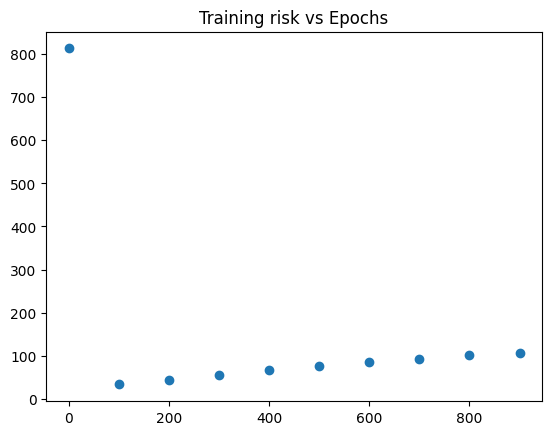

In [297]:
pred_r1 = training_model(r1,1000,100)

In [177]:
t = pred_r1[:,0]
t.shape

(14000,)

[[-10.19703954  -2.94533664   7.65322486]
 [ -7.10472829  -1.73212259   5.33297297]
 [ -4.10876215  -0.56147019   3.08277065]
 ...
 [ -7.53538835  -1.90389899   5.65478544]
 [ -6.74764069  -1.59128609   5.06538762]
 [-13.08126625  -4.08476905   9.8136477 ]]
[[ -6.9390771   -3.5141097    5.58400634]
 [ -9.29075382   3.67696447   2.10515655]
 [-11.34536323  -6.77817976  -3.04254964]
 ...
 [ -6.28478265  -5.62432372   5.48386419]
 [ -5.18649196  -1.73726433   3.72330737]
 [-14.00997011  -0.73785328  13.0104406 ]]
MSE: 44.32838477158851
MAE: 4.963790498890571
PCC: 0.5943499871749568


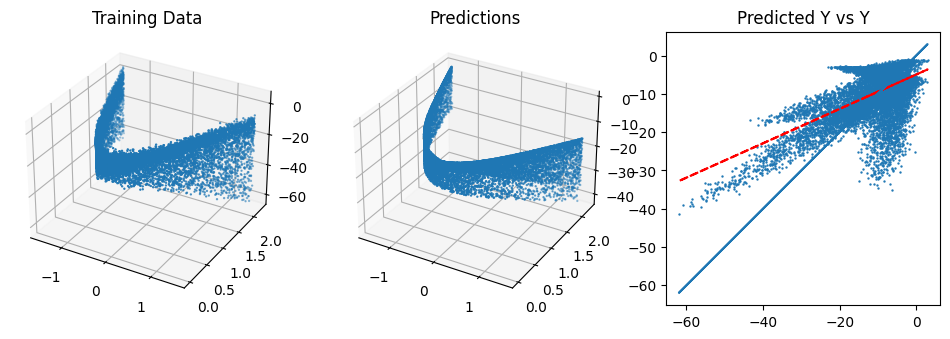

MSE: 29.527991102653534
MAE: 3.6232121306454315
PCC: 0.6345263932714458


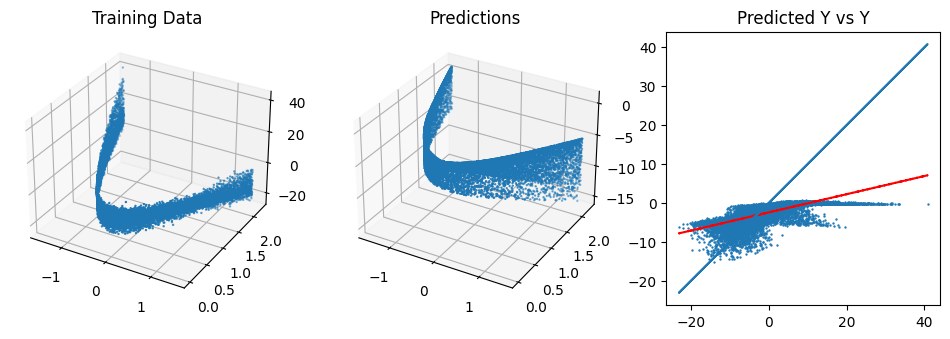

MSE: 49.20358116386851
MAE: 5.341267250949203
PCC: 0.7266410650214907


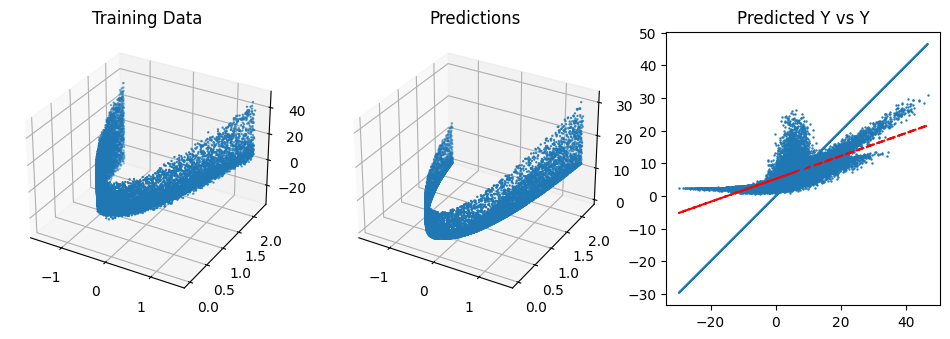

In [298]:
def plotting(pred_y,y):
    for i in range(y.shape[1]):
        #print("Shapes:",y[:,i].shape,pred_y[:,i].shape)
        print_metrics(y[:,i],pred_y[:,i])
        regression_plot(pred_y[:,i],X2,y[:,i])
        
print(pred_r1)
print(Y2)
        
plotting(pred_r1,Y2)

In [299]:
file_name = 'data_prnn1/regression_data_multiGen_group_19_train.txt'
X_sub=[]
Y_sub=[]
X3=[]
Y3=[]
k=3  
with open(file_name,"r") as csvfile:
    reader_variable = csv.reader(csvfile,delimiter="\t")
    for row in reader_variable:
        X_sub.append(row[0:2])
        Y_sub.append(row[2:5])
        
X_sub = np.array(X_sub[1:])
Y_sub = np.array(Y_sub[1:])
"""for i in range(1,len(Y_sub)):
    row = []
    if k==2:
        Y.append(float(Y_sub[i]))
    for j in range(5):
        
        row.append(float(X_sub[i][j]))
    X.append(row)

if k>2:
    for i in range(1,len(Y_sub)):
        c=[0]*k
        c[Y_sub[i]] = 1
        Y.append(c)"""
    
    
X3 = X_sub.astype(float)
Y3 = Y_sub.astype(float)
    
#print(Y) #to test how data set is looking
print(X3)
print(Y3)
print(X3.shape)
print(Y3.shape)

[[ 0.76336341  0.61606992]
 [ 0.44910424  0.20225792]
 [-0.29294454  1.43089312]
 ...
 [ 0.22350244  1.34262761]
 [ 0.31012893  0.3022439 ]
 [ 0.69982601 -0.93917357]]
[[ -6.9390771   -3.5141097    5.58400634]
 [ -9.29075382   3.67696447   2.10515655]
 [-11.34536323  -6.77817976  -3.04254964]
 ...
 [ -6.28478265  -5.62432372   5.48386419]
 [ -5.18649196  -1.73726433   3.72330737]
 [-14.00997011  -0.73785328  13.0104406 ]]
(14000, 2)
(14000, 3)


Risk on Epoch 0 : 1925.3921179609822
Risk on Epoch 100 : 8.050999221601776
Risk on Epoch 200 : 63.711280405264574
Risk on Epoch 300 : 91.6281489320725
Risk on Epoch 400 : 109.77136274748297
Risk on Epoch 500 : 112.14154859862478
Risk on Epoch 600 : 112.19552948614108
Risk on Epoch 700 : 112.26748347986057
Risk on Epoch 800 : 112.37092594419502
Risk on Epoch 900 : 112.49623507084003


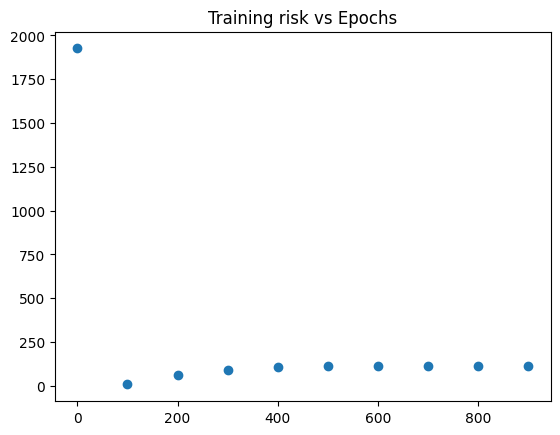

In [300]:
r3 = MLP(X3,Y3,3,"sq_err",5,[5,4,3,3,2],0.0001,batch_size = 7000,last_act = "x")
pred_r3 = training_model(r3,1000,100)

[[ -6.9390771   -3.5141097    5.58400634]
 [ -9.29075382   3.67696447   2.10515655]
 [-11.34536323  -6.77817976  -3.04254964]
 ...
 [ -6.28478265  -5.62432372   5.48386419]
 [ -5.18649196  -1.73726433   3.72330737]
 [-14.00997011  -0.73785328  13.0104406 ]]
[[ -7.70157812  -2.08694604   6.2105634 ]
 [ -9.03835553  -2.70120099   7.64647262]
 [  1.01375942   1.91134271  -3.12122678]
 ...
 [ -1.39027032   0.8089261   -0.54931927]
 [ -7.9349269   -2.19499781   6.46504671]
 [-16.78402203  -6.25606732  15.94662012]]
MSE: 61.03793247209625
MAE: 5.745762707313821
PCC: 0.4519628525593744


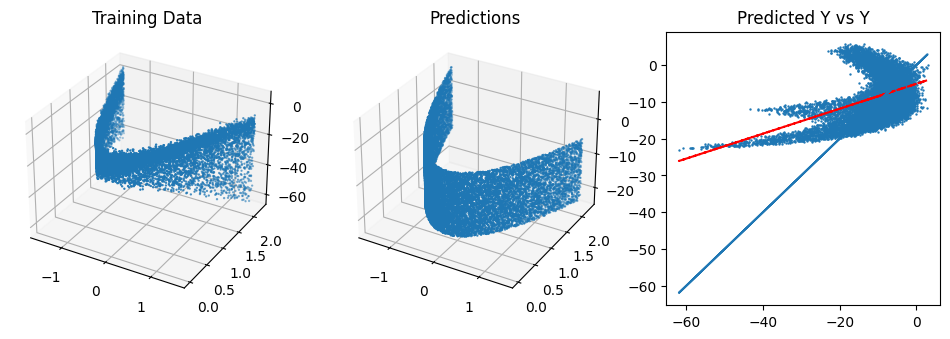

MSE: 28.833012455402553
MAE: 3.9573121789749255
PCC: 0.6078002098307624


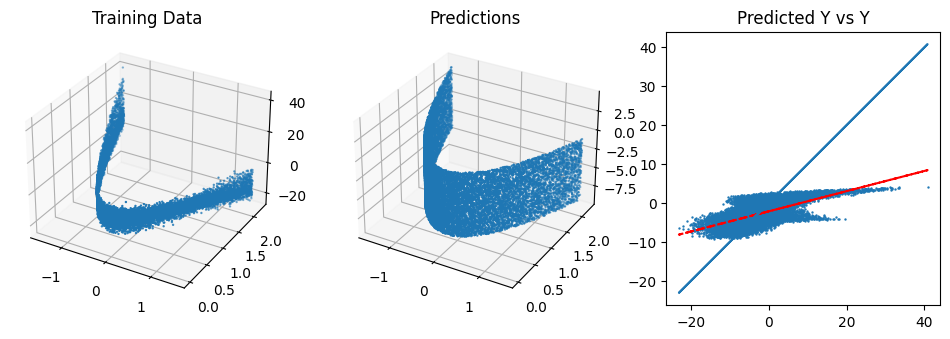

MSE: 26.20205779672769
MAE: 3.888032384502705
PCC: 0.8727357117026843


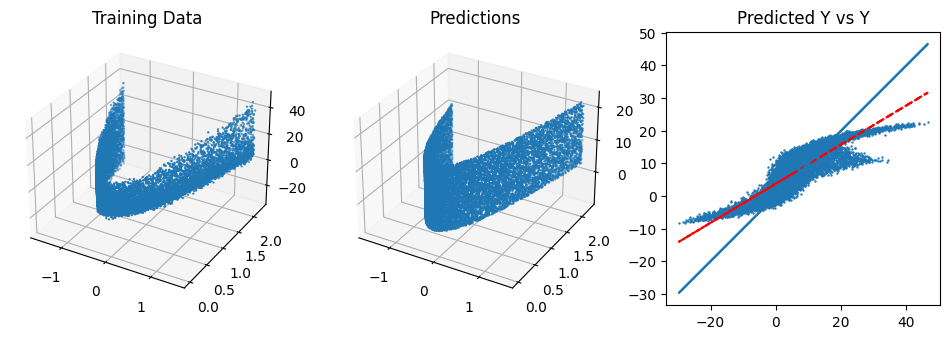

In [301]:
print(Y3)
print(pred_r3)

plotting(pred_r3,Y3)

# Convolution Neural Network for Image Classification
Convolutional Neural Networks (CNNs) are a great deep learning architecture for classifying grid-structured data like images. 

We will be training a CNN for classifying the KMNIST dataset. There are 10 labels (10 Japanese Characters) which are to be predicted. We have 60K training images, labels and 10K testing images, labels.
First we start off by loading the images, converting them to class characters and one-hot encode them.

In [1]:
import numpy as np
import pandas as pd

# Load the KMNIST dataset from .npz files
def load_kmnist_images(file):
    with np.load(file) as data:
        images = data['arr_0']
    return images

def load_kmnist_labels(file):
    with np.load(file) as data:
        labels = data['arr_0']
    return labels

# Load the class mapping file
def load_class_mapping(file):
    class_mapping = pd.read_csv(file, header=None, index_col=0)
    return class_mapping[1].to_dict()

# Load training and testing data
X_train = load_kmnist_images('kmnist-train-imgs.npz')
y_train = load_kmnist_labels('kmnist-train-labels.npz')
X_test = load_kmnist_images('kmnist-test-imgs.npz')
y_test = load_kmnist_labels('kmnist-test-labels.npz')


print(f'{X_train.shape = }')
print(f'{y_train.shape = }')

# Normalize the data
X_train = X_train / 255.0
X_test  =  X_test / 255.0

# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  =  X_test.reshape(-1, 28, 28, 1)

# Load class mapping
class_mapping = load_class_mapping('kmnist_classmap.csv')

#print(class_mapping[0])
# Map class labels to characters
y_train_characters = np.array([class_mapping[str(label)] for label in y_train])
y_test_characters  = np.array([class_mapping[str(label)] for label in y_test])

def vectorize(y, num_labels=10):
    y_vector = np.zeros(num_labels)
    y_vector[y] = 1
    return y_vector

y_train = np.array([vectorize(y) for y in y_train])
y_test  = np.array([vectorize(y) for y in y_test])

# Printing some examples for seeing
print("Example labels (class indices):", y_train[:5])
print("Corresponding characters:", y_train_characters[:5])
print(f'{X_test.shape = }')

X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
Example labels (class indices): [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Corresponding characters: ['U+308C' 'U+3084' 'U+304A' 'U+304D' 'U+306A']
X_test.shape = (10000, 28, 28, 1)


Let us look at all the layers and processes one by one.
## Convolutional Layer

## What exactly are we looking at?

The following class is the convolutional layer. The convolution operation is a fundamental building block in CNNs for extracting features from input data.

## Convolution Operation

Slide a kernel (or filter) over the input data and perform element-wise multiplications and then sum to produce a feature map.

### Forward Pass

During the forward pass, input is convolved with learnable kernels to produce the output feature map. The dimensions of the output feature map: kernel size, number of kernels, stride, and padding.

The output feature map (Y) is computed as follows:

$Y[i, h, w, :] = \sum_{c=1}^{C} \sum_{m=1}^{M} \sum_{n=1}^{N} (X[:, h+m-1, w+n-1, c] \cdot K[i, m, n, c]) + b[i]$

where:
- $Y$ is the output feature map.
- $X$ is the input data.
- $K$ are the learnable convolutional filters.
- $b$ is a bias term for each kernel.
- $i$ iterates over the number of kernels.
- $h$ iterates over the height dimension of the output feature map.
- $w$ iterates over the width dimension of the output feature map.
- $C$ is the input depth.
- $M$ and $N$ are the kernel size dimensions.
  
### Backward Pass

During the backward pass, we basically do gradient descent to update parameters.

The gradients with respect to the input data (dL/dX) and the kernels (dL/dK) are computed as follows:

$\frac{\partial L}{\partial X}[h, w, :] = \sum_{i=1}^{K} \sum_{m=1}^{M} \sum_{n=1}^{N} (K[i, m, n, :] \cdot \frac{\partial L}{\partial Y}[h-m+1, w-n+1, i])$

$\frac{\partial L}{\partial K}[i, m, n, :] = \sum_{h=1}^{H} \sum_{w=1}^{W} (X[:, h+m-1, w+n-1, :] \cdot \frac{\partial L}{\partial Y}[h, w, i])$

where:
- $\frac{\partial L}{\partial X}$ is the gradient of the loss with respect to the input data.
- $\frac{\partial L}{\partial Y}$ is the gradient of the loss with respect to the output feature map.
- $\frac{\partial L}{\partial K}$ is the gradient of the loss with respect to the kernels.
- $H$ and $W$ are the height and width of the output feature map respectively.
- $K$ is the number of kernels.
  
## Implementation 

- Initialise `Convolution` class with parameters: input shape, kernel size, number of kernels, stride, and padding.
- Random initialization is performed for the kernels and bias terms sampled from a std. normal distribution
- The forward pass computes the output feature map by convolving the input data with the kernels.
- The backward pass computes the gradients of the loss with respect to the input data and kernels.
- update parameters by gradient descent.

In [2]:
# Define the convolutional layer class
class Convolution:
    def __init__(self, input_shape, kernel_size, n_kernels, stride, padding):
        input_width, input_height, input_depth = input_shape
        # self.input_shape = input_shape
        self.kernel_size = kernel_size
        self.n_kernels = n_kernels
        self.input_depth = input_depth
        self.kernel_depth = input_depth
        self.stride = stride
        self.padding = padding
        self.output_shape = (n_kernels, input_height - kernel_size[0] + 1, input_width - kernel_size[1] + 1)
        self.kernel_shape = (n_kernels, input_depth, kernel_size[0], kernel_size[1])
        self.kernels = np.random.randn(*self.kernel_shape)
        self.bias = np.random.randn(*self.output_shape)

    def forward(self, X):
        self.X = X
        try:
            batch_size, input_height, input_width, input_depth = X.shape
        except ValueError:
            print(X.shape)
            raise
        output_height = input_height - self.kernel_size[0] + 1
        output_width  = input_width  - self.kernel_size[1] + 1
        self.y = np.zeros((batch_size, output_height, output_width, self.n_kernels))

        for i in range(self.n_kernels):
            for h in range(output_height):
                for w in range(output_width):
                    input_patch = X[:, h:h+self.kernel_size[0], w:w+self.kernel_size[1], :]
                    for j in range(input_depth):
                        self.y[:, h, w, i] += np.sum(input_patch[:, :, :, j] * self.kernels[i, j], axis=(1, 2))
        return self.y


    def backward(self, dLdY, eta):
        output_height, output_width, _ = dLdY.shape # Batch size is the first dimension which represents the number of samples
        dx = np.zeros_like(self.X)
        dK = np.zeros_like(self.kernels)

        for i in range(self.n_kernels):
            for h in range(output_height):
                for w in range(output_width):
                    for j in range(self.input_depth):
                        input_patch = self.X[:, h:h+self.kernel_size[0], w:w+self.kernel_size[1], j]
                        dK[i, j] += np.sum(input_patch * dLdY[h, w, i][np.newaxis, np.newaxis], axis=0)
                        dx[:, h:h+self.kernel_size[0], w:w+self.kernel_size[1], j] += dLdY[h, w, i][np.newaxis, np.newaxis] * self.kernels[i, j]

        self.kernels -= eta * dK
        self.bias -= eta * np.sum(dLdY, axis=(0, 1, 2))
        return np.mean(dx, axis=0)

# Max Pooling

## Introduction

The Max Pooling layer is used for down-sampling and reducing the dimensions of feature maps while retaining the most important information.

## Max Pooling Operation

The Max Pooling operation divides the input feature map into non-overlapping rectangular regions and outputs the maximum value from each region.

### Forward Pass

During the forward pass, first do the max pooling operation. The maximum value within each region is selected to form the output feature map.

The output feature map (Y) is computed as follows:

$Y[i, j, k] = \max_{m, n} (X[i, j \cdot \text{stride} + m, k \cdot \text{stride} + n])$

where:
- $Y$ is the output feature map.
- $X$ is the input feature map.
- $i$ iterates over the batch dimension.
- $j$ iterates over the height dimension of the output feature map.
- $k$ iterates over the width dimension of the output feature map.
- $m$ and $n$ iterate over the pool size dimensions.

### Backward Pass

During the backward pass, the gradients of the loss function with respect to the input feature map are computed based on the gradients of the output feature map.

The gradients with respect to the input feature map ($\frac{\partial L}{\partial X}$) are computed as follows:

$\frac{\partial L}{\partial X}[i, j \cdot \text{stride} + m, k \cdot \text{stride} + n] = \begin{cases}
\frac{\partial L}{\partial Y}[i, j, k] & \text{if } X[i, j \cdot \text{stride} + m, k \cdot \text{stride} + n] = \max_{p, q} (X[i, j \cdot \text{stride} + p, k \cdot \text{stride} + q]) \\
0 & \text{otherwise}
\end{cases}$

where:
- $\frac{\partial L}{\partial X}$ is the gradient of the loss with respect to the input feature map.
- $\frac{\partial L}{\partial Y}$ is the gradient of the loss with respect to the output feature map.

## Implementation 

- The `MaxPooling` class is initialized with parameters such as input shape, pool size, and stride.
- The forward pass computes the output feature map by selecting the maximum value from each pooling region.
- The backward pass computes the gradients of the loss with respect to the input feature map based on the gradients of the output feature map.
- Average pooling is used for backpropagation.

In [3]:
# Define the max pooling layer class
class MaxPooling:
    def __init__(self, input_shape, pool_size, stride):
        self.input_shape = input_shape
        self.pool_size = pool_size
        self.stride = stride
        self.output_shape = ((input_shape[0] - pool_size[0] + 1) // stride, (input_shape[1] - pool_size[1] + 1) // stride, input_shape[2])

    def forward(self, X):
        self.X = X
        batch_size = X.shape[0]
        self.y = np.zeros((batch_size, *self.output_shape))

        # for i in range(self.output_shape[0]):
        #     for j in range(self.output_shape[1]):
        #         for k in range(self.output_shape[2]):
        for i in range(self.output_shape[0]):
            for j in range(self.output_shape[1]):
                for k in range(self.output_shape[2]):
                    temp = X[:, i * self.stride:i * self.stride + self.pool_size[0], j * self.stride:j * self.stride + self.pool_size[1], k]
                    # print(temp.shape)
                    if temp.size > 0:
                        self.y[:, i, j, k] = np.max(temp)

        return self.y

    def backward(self, dLdY, eta):
        dLdX = np.zeros_like(self.X)

        for nigga in range(self.X.shape[0]):
            for i in range(self.output_shape[0]):
                for j in range(self.output_shape[1]):
                    for k in range(self.output_shape[2]):
                        max_value = np.max(self.X[nigga,
                                                i * self.stride: i * self.stride + self.pool_size[0],
                                                j * self.stride: j * self.stride + self.pool_size[1],
                                                k])

                        for m in range(self.pool_size[0]):
                            for n in range(self.pool_size[1]):
                                if self.X[nigga, i * self.stride + m, j * self.stride + n, k] == max_value:
                                    dLdX[nigga, i * self.stride + m, j * self.stride + n, k] = dLdY[i, j, k]
        return np.mean(dLdX, axis=0)

# ReLU Activation

## Introduction

Introduces non-linearity and replaces all negative values in the input with zero.

## Definition

$$
\text{ReLU}(x) =
\begin{cases}
x & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}
$$

### Forward Pass

During the forward pass, the ReLU activation function is applied element-wise to the input. It replaces all negative values with zero.

The output is computed as follows:

$$
\text{ReLU}(X) = \text{max}(0, X)
$$

where:
- $X$ is the input.

### Backward Pass

During the backward pass, the gradient of the loss function with respect to the input is computed based on the gradients of the output.

The gradient with respect to the input is computed as follows:

$$
\frac{\partial L}{\partial X} = \text{mean}(dy \cdot (X > 0))
$$

where:
- $\frac{\partial L}{\partial X}$ is the gradient of the loss with respect to the input.
- $dy$ is the gradient of the loss with respect to the output.

# Softmax Activation

## Introduction

Commonly used for multiclass classification. It converts the raw output scores into probabilities that sum up to one.

## Definition

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

### Forward Pass

During the forward pass, the Softmax activation function is applied element-wise to the input. It computes the probabilities for each class.

The output is computed as follows:

$$
\text{Softmax}(X_i) = \frac{e^{X_i - \text{max}(X_i)}}{\sum_{j} e^{X_j - \text{max}(X_i)}}
$$

where:
- $X$ is the input.
- $X_i$ is the $i$-th element of the input.

### Backward Pass

The gradient of the loss function with respect to the input is calculated. Since Softmax is used mainly in the output layer, the gradient is externally availiable.

The gradient with respect to the input is given as:

$$
\frac{\partial L}{\partial X} = dy
$$

where:
- $\frac{\partial L}{\partial X}$ is the gradient of the loss with respect to the input.
- $dy$ is the gradient of the loss with respect to the output.



In [4]:
# Define the ReLU activation layer class
class ReLU:
    def forward(self, X):
        self.X = X
        return np.maximum(0, X)

    def backward(self, dy, eta):
        return np.mean(dy * (self.X > 0), axis=0)

In [5]:
# Define the Softmax activation layer class
class Softmax:
    def forward(self, X):
        exps = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def backward(self, dy, eta):
        return dy

# Fully Connected Layer 

## Introduction

Also known as the dense layer, here each neuron in the layer is connected to every neuron in the previous layer. This allows the layer to learn complex patterns from the input data.

## Fully Connected Operation

A linear transformation followed by an activation function is done by matrix multiplication of the input with the weight matrix, and adding bias (vector).

### Initialization

During initialization, the weights (W) and biases (b) are randomly initialized from std. normal distribution using np.random.randn.

### Forward Pass

We compute Y from X, W, b: 
$$
Y = X \cdot W + b
$$

where:
- $Y$ is the output.
- $X$ is the input data.
- $W$ is the weight matrix.
- $b$ is the bias vector.

### Backward Pass

During the backward pass, the gradients of the loss function with respect to the input, weights, and biases are computed.

and then the parameters are updated.

- Gradient with respect to weights ($\frac{\partial L}{\partial W}$):

$$
\frac{\partial L}{\partial W} = \frac{1}{N} \sum_{i=1}^{N} (X_i \cdot \frac{\partial L}{\partial Y_i})
$$

- Gradient with respect to biases ($\frac{\partial L}{\partial b}$):

$$
\frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} \frac{\partial L}{\partial Y_i}
$$

- Gradient with respect to input ($\frac{\partial L}{\partial X}$):

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \cdot W^T
$$

where:
- $N$ is the batch size.
- $\frac{\partial L}{\partial W}$ is the gradient of the loss with respect to the weights.
- $\frac{\partial L}{\partial b}$ is the gradient of the loss with respect to the biases.
- $\frac{\partial L}{\partial X}$ is the gradient of the loss with respect to the input.
- $\frac{\partial L}{\partial Y}$ is the gradient of the loss with respect to the output.

## Implementation Details

- The `FullyConnected` class is initialized with parameters such as input shape and output shape.
- Random initialization is performed for the weights and biases again from std. normal distr.
- The forward pass computes the output by performing matrix multiplication and addition.
- The backward pass computes the gradients of the loss with respect to the input, weights, and biases.
- Model parameters are updated using gradient descent.


In [6]:
# Define the fully connected layer class
class FullyConnected:
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.W = np.random.randn(input_shape, output_shape)
        self.b = np.random.randn(output_shape)

    def forward(self, X):
        self.X = X
        return np.dot(self.X, self.W) + self.b

    def backward(self, dLdY, eta):
        print("dLdY shape:", dLdY.shape)
        print("self.X shape:", self.X.shape)
        print("self.W shape:", self.W.shape)
        
        self.W = self.W.reshape((self.W.shape[0], -1, 1))  # Reshape W to (256, 10, 1)
        print(f'{self.W.shape = }')
        dW = np.mean([np.outer(x, dLdY) for x in self.X])
        self.W = self.W.reshape(self.W.shape[0], self.W.shape[1])  # Reshape W back after calculation
        db = np.sum(dLdY, axis=0)   / self.X.shape[0]  # Compute mean gradient over the batch dimension
        dx = np.dot(dLdY, self.W.T)
        
        print("dW shape after calculation:", dW.shape)
        print("db shape after calculation:", db.shape)
        print("dx shape after calculation:", dx.shape)
        
        self.W -= eta * dW
        self.b -= eta * db
        return dx

# Reshape Layer 

## Introduction

Changes the shape of the input tensor without changing its data for compatibility with different layer types or reshaping the output of one layer to match the input requirements of another layer. Not compulsorily used everywhere. More of a utility rather than neccesity.

## Reshape Operation

The Reshape layer reshapes the input tensor into the specified output shape.

### Initialization

Initialise according to the input shape and the desired output shape as specified.

### Forward Pass

Reshape operation is applied. 

The output is computed as follows:


Reshape(X) = X.reshape((-1, output_shape))


where:
- $X$ is the input tensor.
- output_shape is the desired output shape.

### Backward Pass

During the backward pass, the gradients of the loss function with respect to the input tensor are computed.

The gradients are computed as follows:

$
\frac{\partial L}{\partial X}$ = dy.reshape(input_shape)


where:
- $\frac{\partial L}{\partial X}$ is the gradient of the loss with respect to the input tensor.
- `dy` is the gradient of the loss with respect to the output tensor.

## Implementation 

- The `Reshape` class is initialized with parameters such as input shape and output shape.
- The forward pass reshapes the input tensor to match the specified output shape.
- The backward pass reshapes the gradient of the loss function with respect to the output tensor to match the input shape.
- This layer does not involve any learnable parameters.
- It serves as a utility layer for reshaping tensors in the neural network architecture.

In [7]:
# Define the Reshape layer class
class Reshape:
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, X):
        return X.reshape((-1, *self.output_shape))

    def backward(self, dy, eta):
        return dy.reshape(self.input_shape)

# CNN Model Architecture

## Introduction

CNN model has many layers including convolutional layers, activation layers (ReLU), pooling layers (MaxPooling), fully connected layers, and activation layers (Softmax).

## Model Layers
In our model we have the following layers which satisfy all input, output shape and other calculations.
A potential flaw in our design is that we have to specify all these input shapes and outputs ourselves, there is no mechanism by which it could be feeded in each layer by previous layer itself. 

1. **Convolutional Layer 1:**
    - Input Shape: (28, 28, 1)
    - Kernel Size: (3, 3)
    - Number of Kernels: 8
    - Stride: 1
    - Padding: 1
    - Activation: ReLU

2. **Max Pooling Layer 1:**
    - Input Shape: (26, 26, 8)
    - Pool Size: (2, 2)
    - Stride: 2

3. **Convolutional Layer 2:**
    - Input Shape: (12, 12, 8)
    - Kernel Size: (3, 3)
    - Number of Kernels: 16
    - Stride: 1
    - Padding: 1
    - Activation: ReLU

4. **Max Pooling Layer 2:**
    - Input Shape: (10, 10, 16)
    - Pool Size: (2, 2)
    - Stride: 2

5. **Reshape Layer:**
    - Input Shape: (4, 4, 16)
    - Output Shape: 256 (4 * 4 * 16)

6. **Fully Connected Layer:**
    - Input Shape: 256
    - Output Shape: 10
    - Activation: Softmax

## Implementation

- The CNN model architecture consists of convolutional layers followed by ReLU activation functions and max pooling layers for feature extraction.
- The feature maps are then flattened using a reshape layer to prepare them for the fully connected layers.
- Fully connected layers are used for classification, with the final layer employing the softmax activation function to output class probabilities.

In [8]:
# Create the CNN model architecture
# Create the CNN model architecture
layers = [
    Convolution(input_shape=(28, 28, 1), kernel_size=(3, 3), n_kernels=8, stride=1, padding=1),
    ReLU(),
    MaxPooling(input_shape=(26, 26, 8), pool_size=(2, 2), stride=2),  
    Convolution(input_shape=(12, 12, 8), kernel_size=(3, 3), n_kernels=16, stride=1, padding=1),
    ReLU(),
    MaxPooling(input_shape=(10, 10, 16), pool_size=(2, 2), stride=2),  
    Reshape(input_shape=(4, 4, 16), output_shape=(4 * 4 * 16,)),  # Adjust input_shape to 400
    FullyConnected(input_shape=256, output_shape=10),  # Adjust input_shape to 400
    Softmax(),
]

For the next few cells we would be doing all the things that I'll explain in this cell. We are basically looking at the whole CNN pipeline. 
# CNN Model Training Pipeline

## Introduction

This training pipeline implements the forward and backward passes for a Convolutional Neural Network (CNN) model using a list of layers. The pipeline includes functions for forward pass, backward pass, loss calculation, and training loop.

## Forward Pass

The forward pass function iterates through each layer in the model and applies the forward operation. The input data is passed through convolutional layers, activation layers (ReLU), max pooling layers, reshape layer, fully connected layers, and softmax activation layer to generate predictions.

## Reshaping Input Data

The input data is reshaped without flattening to match the input requirements of the CNN model. Each image is reshaped to have one channel.

## Backward Pass

The backward pass function iterates through the layers in reverse order and applies the backward operation. The gradients of the loss function with respect to the output of each layer are computed and used to update the model parameters.

## Loss Calculation

The cross-entropy loss function is used to measure the difference between the predicted and true labels. It computes the average negative log likelihood of the predicted probabilities for each class.

## Training Loop

The training loop iterates through multiple epochs. In each epoch, the forward pass is performed to generate predictions, and the loss is calculated using the cross-entropy loss function. Then, the backward pass is executed to compute gradients and update the model parameters using gradient descent.


In [9]:
# Define the forward pass function
def forward(X):
    for layer in layers:
        print(X.shape)
        print(layer)
        X = layer.forward(X)
    return X

# Reshape the input data without flattening
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)  # Reshape each image to have one channel
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# Perform the forward pass
y_pred_train = forward(X_train)
print (y_pred_train.shape)

(60000, 28, 28, 1)
(60000, 26, 26, 8)
(60000, 26, 26, 8)
(60000, 12, 12, 8)
(60000, 10, 10, 16)
(60000, 10, 10, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 10)
(60000, 10)


In [10]:
# Ensure y_pred_train has the correct shape
y_pred_train = y_pred_train.reshape(y_pred_train.shape[0], -1)  # Reshape to (60000, 10)

# Printing shapes for verification
print(y_train.shape)
print(y_pred_train.shape)

# Define the backward pass function
def backward(dLdY, eta):
    for layer in reversed(layers):
        print(f'{dLdY.shape = } for layer {layer}')
        dLdY = layer.backward(dLdY, eta)
    return dy

(60000, 10)
(60000, 10)


In [11]:
# Define the cross-entropy loss function
def cross_entropy(y_pred, y_true, eps=1e-9):
    print(f'{y_pred.shape = }')
    print(f'{y_true.shape = }')
    return -np.mean(np.sum(y_true[:, :, None] * np.log(y_pred[:, :, None] + eps), axis=1))
    
def cross_entropy_gradient(y_pred, y_true, eps=1e-9):
    print(f'{y_pred.shape = }')
    print(f'{y_true.shape = }')
    # Correct calculation of dy (gradient of loss w.r.t. y_pred)
    dy = -(y_true / (y_pred + eps))  # Shape: (batch_size, num_classes)
    return np.mean(dy, axis=0)  # Average over batch dimension

In [12]:
# Backward pass and weight update
dy = cross_entropy_gradient(y_pred_train, y_train)
print(dy.shape)
eta = 0.001
dy = backward(dy, eta)

y_pred.shape = (60000, 10)
y_true.shape = (60000, 10)
(10,)
dLdY.shape = (10,) for layer <__main__.Softmax object at 0x7fd228e49310>
dLdY.shape = (10,) for layer <__main__.FullyConnected object at 0x7fd1fc7c0dd0>
dLdY shape: (10,)
self.X shape: (60000, 256)
self.W shape: (256, 10)
self.W.shape = (256, 10, 1)
dW shape after calculation: ()
db shape after calculation: ()
dx shape after calculation: (256,)
dLdY.shape = (256,) for layer <__main__.Reshape object at 0x7fd132977c50>
dLdY.shape = (4, 4, 16) for layer <__main__.MaxPooling object at 0x7fd228e52dd0>
dLdY.shape = (10, 10, 16) for layer <__main__.ReLU object at 0x7fd1fc72a150>
dLdY.shape = (10, 10, 16) for layer <__main__.Convolution object at 0x7fd228e0ae90>
dLdY.shape = (12, 12, 8) for layer <__main__.MaxPooling object at 0x7fd132698c10>
dLdY.shape = (26, 26, 8) for layer <__main__.ReLU object at 0x7fd2241b8dd0>
dLdY.shape = (26, 26, 8) for layer <__main__.Convolution object at 0x7fd1326c9250>


In [13]:
loss_train = cross_entropy(y_pred_train, y_train)

# Training loop
epochs = 3
learning_rate = 0.001

for epoch in range(epochs):
    # Forward pass
    y_pred_train = forward(X_train)
    loss_train = cross_entropy(y_pred_train, y_train)

    # Backward pass and weight update
    dydL = cross_entropy_gradient(y_pred_train, y_train)
    dydL = backward(dy, learning_rate)

    # Validation after each epoch
    y_pred_val = forward(X_test)
    loss_val = cross_entropy(y_pred_val, y_test)
    print(f"Epoch: {epoch + 1}, Training Loss: {loss_train}, Validation Loss: {loss_val}")

y_pred.shape = (60000, 10)
y_true.shape = (60000, 10)
(60000, 28, 28, 1)
(60000, 26, 26, 8)
(60000, 26, 26, 8)
(60000, 12, 12, 8)
(60000, 10, 10, 16)
(60000, 10, 10, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 10)
y_pred.shape = (60000, 10)
y_true.shape = (60000, 10)
y_pred.shape = (60000, 10)
y_true.shape = (60000, 10)
dLdY.shape = (10,) for layer <__main__.Softmax object at 0x7fd228e49310>
dLdY.shape = (10,) for layer <__main__.FullyConnected object at 0x7fd1fc7c0dd0>
dLdY shape: (10,)
self.X shape: (60000, 256)
self.W shape: (256, 10)
self.W.shape = (256, 10, 1)
dW shape after calculation: ()
db shape after calculation: ()
dx shape after calculation: (256,)
dLdY.shape = (256,) for layer <__main__.Reshape object at 0x7fd132977c50>
dLdY.shape = (4, 4, 16) for layer <__main__.MaxPooling object at 0x7fd228e52dd0>
dLdY.shape = (10, 10, 16) for layer <__main__.ReLU object at 0x7fd1fc72a150>
dLdY.shape = (10, 10, 16) for layer <__main__.Convolution object at 0x7fd228e0ae90>
dLdY.shape = (12

/tmp/ipykernel_756740/742390839.py:4: RuntimeWarning: invalid value encountered in subtract
  exps = np.exp(X - np.max(X, axis=1, keepdims=True))


In [14]:
# Testing
print(X_test.shape)
y_pred = forward(X_test)
predicted_classes = np.argmax(y_pred)
accuracy = np.mean(predicted_classes == y_test)
print(f"Test Accuracy: {accuracy}")

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 26, 26, 8)
(10000, 26, 26, 8)
(10000, 12, 12, 8)
(10000, 10, 10, 16)
(10000, 10, 10, 16)
(10000, 4, 4, 16)
(10000, 256)
(10000, 10)
Test Accuracy: 0.9


/tmp/ipykernel_756740/742390839.py:4: RuntimeWarning: invalid value encountered in subtract
  exps = np.exp(X - np.max(X, axis=1, keepdims=True))


# Regularization Techniques in CNN Training

## Introduction

Regularization techniques are essential for preventing overfitting and improving the generalization performance of neural networks. In this code snippet, three regularization techniques are applied during CNN training.

## L2 Regularization

L2 regularization is a common technique used to prevent overfitting by adding a penalty term to the loss function. It encourages smaller weights by adding the sum of squared weights to the loss function. The regularization strength is controlled by the hyperparameter lambda.

### Explained

The L2 regularization term is added to the loss function as follows:

loss_train = cross_entropy($\hat{y}$ _train, y_train) + $ \frac{1}{2} \lambda \sum_{i=1}^{N} \sum_{j=1}^{M} w_{ij}^2 $

where:
- cross_entropy($\hat{y}$ _train, y_train) is the cross-entropy loss between the predicted and true labels for the training data.
- $\lambda$ is the regularization strength.
- $N$ is the number of layers with trainable weights.
- $M$ is the number of parameters in each layer.
- $w_{ij}$ represents the weight parameter.

## Dropout

Dropout is a technique used to prevent co-adaptation of neurons by randomly setting a fraction of neuron outputs to zero during training. This helps to prevent overfitting by introducing noise and redundancy into the network. The dropout rate determines the fraction of neurons to drop out during training.

### Explained

During training, each neuron's output is set to zero with probability $p$, and scaled by $\frac{1}{1 - p}$ to maintain the expected value during inference. Mathematically, this can be represented as:

$$
\text{dropout\_mask} = \text{random\_mask} < (1 - p)
$$

$$
\text{output} = \text{input} \cdot \text{dropout\_mask} \cdot \frac{1}{1 - p}
$$

where:
- $\text{random\_mask}$ is a matrix of random values between 0 and 1.
- $p$ is the dropout rate.
- $\text{dropout\_mask}$ is a binary mask indicating which neurons to drop out.
- $\text{input}$ is the input to the dropout layer.
- $\text{output}$ is the output of the dropout layer.

## Early Stopping

Early stopping is a technique used to prevent overfitting by monitoring the validation loss during training. If the validation loss does not improve for a certain number of epochs (early_stopping_threshold), training is terminated early to prevent further overfitting.

### How is it exactly working?

The early stopping criterion is based on monitoring the validation loss. If the validation loss does not decrease for a specified number of epochs (early_stopping_threshold), training is stopped early to prevent overfitting.

$$
\text{if } \text{val\_loss}_{\text{epoch}} \geq \text{val\_loss}_{\text{epoch} - 1} \text{ for } \text{early\_stopping\_threshold} \text{ epochs}:
$$

$$
\text{terminate\_training}
$$

## Conclusion

These regularization techniques help to improve the generalization performance of the CNN model and prevent overfitting to the training data. The mathematical formulations provide insights into how each technique is applied and their impact on the training process.


In [ ]:
# Three techniques we would use namlely L2, dropout and early stopping.
# Define the regularization strength for L2 regularization
l2_lambda = 0.01

# Define dropout rate
dropout_rate = 0.5

# Define number of epochs for early stopping
max_epochs = 100
early_stopping_threshold = 5
early_stopping_counter = 0
best_loss = float('inf')

# Lists to store training and validation losses for each epoch
train_losses = []
val_losses = []

for epoch in range(max_epochs):
    # Forward pass
    y_pred_train = forward(X_train)
    loss_train = cross_entropy(y_pred_train, y_train)
    
    # L2 regularization
    l2_loss = 0.5 * l2_lambda * np.sum([np.sum(layer.W ** 2) for layer in layers if hasattr(layer, 'W')])
    loss_train += l2_loss
    
    # Backward pass and weight update with L2 regularization
    dydL = cross_entropy_gradient(y_pred_train, y_train)
    dydL = backward(dydL, learning_rate)
    
    # Validation loss
    y_pred_val = forward(X_test)
    loss_val = cross_entropy(y_pred_val, y_test)

    # We will use three regularisation techniques
    # L2 regularization on validation loss
    l2_loss_val = 0.5 * l2_lambda * np.sum([np.sum(layer.W ** 2) for layer in layers if hasattr(layer, 'W')])
    loss_val += l2_loss_val
    
    # Apply dropout during training
    if epoch < max_epochs - 1:
        output_shape = layers[7].output_shape
        if isinstance(output_shape, int):
            output_shape = (output_shape,)  # Convert single integer to a tuple
        layers[7].dropout_mask = (np.random.rand(*output_shape) < (1 - dropout_rate)) / (1 - dropout_rate)

    # Early stopping
    if loss_val < best_loss:
        best_loss = loss_val
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_threshold:
            print("Early stopping at epoch:", epoch + 1)
            break
    
    # Store losses
    train_losses.append(loss_train)
    val_losses.append(loss_val)
    
    # Print epoch info
    print(f"Epoch: {epoch + 1}, Training Loss: {loss_train}, Validation Loss: {loss_val}")



(60000, 28, 28, 1)
(60000, 26, 26, 8)
(60000, 26, 26, 8)
(60000, 12, 12, 8)
(60000, 10, 10, 16)
(60000, 10, 10, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 10)
y_pred.shape = (60000, 10)
y_true.shape = (60000, 10)
y_pred.shape = (60000, 10)
y_true.shape = (60000, 10)
dLdY.shape = (10,) for layer <__main__.Softmax object at 0x7fd228e49310>
dLdY.shape = (10,) for layer <__main__.FullyConnected object at 0x7fd1fc7c0dd0>
dLdY shape: (10,)
self.X shape: (60000, 256)
self.W shape: (256, 10)
self.W.shape = (256, 10, 1)


/tmp/ipykernel_756740/742390839.py:4: RuntimeWarning: invalid value encountered in subtract
  exps = np.exp(X - np.max(X, axis=1, keepdims=True))


dW shape after calculation: ()
db shape after calculation: ()
dx shape after calculation: (256,)
dLdY.shape = (256,) for layer <__main__.Reshape object at 0x7fd132977c50>
dLdY.shape = (4, 4, 16) for layer <__main__.MaxPooling object at 0x7fd228e52dd0>
dLdY.shape = (10, 10, 16) for layer <__main__.ReLU object at 0x7fd1fc72a150>
dLdY.shape = (10, 10, 16) for layer <__main__.Convolution object at 0x7fd228e0ae90>
dLdY.shape = (12, 12, 8) for layer <__main__.MaxPooling object at 0x7fd132698c10>
dLdY.shape = (26, 26, 8) for layer <__main__.ReLU object at 0x7fd2241b8dd0>
dLdY.shape = (26, 26, 8) for layer <__main__.Convolution object at 0x7fd1326c9250>
(10000, 28, 28, 1)
(10000, 26, 26, 8)
(10000, 26, 26, 8)
(10000, 12, 12, 8)
(10000, 10, 10, 16)
(10000, 10, 10, 16)
(10000, 4, 4, 16)
(10000, 256)
(10000, 10)
y_pred.shape = (10000, 10)
y_true.shape = (10000, 10)
Epoch: 1, Training Loss: nan, Validation Loss: nan
(60000, 28, 28, 1)
(60000, 26, 26, 8)
(60000, 26, 26, 8)
(60000, 12, 12, 8)
(60000

In [ ]:
# Now we will just plot bias variance curves
plt.plot(range(1, epoch + 1), train_losses[:epoch + 1], label='Training Loss')
plt.plot(range(1, epoch + 1), val_losses[:epoch + 1], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Bias-Variance Curves')
plt.legend()
plt.show()
